# Project - automobile gas mileage

#### Team Member

Abhinav Munagala

In [8]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

# Define column names
column_names = ['symboling', 'normalized-losses', 'manufacturer', 'fuel-type', 'aspiration', 'num-of-doors','body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height',
                'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore','stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Read the CSV file with specified column names
url = "https://raw.githubusercontent.com/mvsakrishna/project2_dam_automobile_gas_mileage/main/M10_Data.csv"
df = pd.read_csv(url, names=column_names)

Importing the data from github and defining the data with appropriate column names

In [9]:
# check for info for datatypes and column details
print(df.info())

# check no of rows and columns of the dataframe
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   manufacturer       205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [10]:

df[['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']].describe()

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [11]:
# value_counts() helps to understand the categorical distribution of the variables
df[['symboling']].value_counts()

symboling
 0           67
 1           54
 2           32
 3           27
-1           22
-2            3
Name: count, dtype: int64

In [12]:
df[['num-of-cylinders']].value_counts()

num-of-cylinders
four                159
six                  24
five                 11
eight                 5
two                   4
three                 1
twelve                1
Name: count, dtype: int64

## Data Cleaning and Preparation

In [13]:
df.replace('?', pd.NA, inplace=True)
missing_values = df.isnull().sum()
print(missing_values)

symboling             0
normalized-losses    41
manufacturer          0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


### normalized-losses

In [14]:
# normalized-losses

print('Missing % of normalized-losses is ', (df['normalized-losses'].isnull().sum()/df.shape[0])*100)

# it seems missing data percentage is pretty high, this follows under numerical variable.

# Convert 'normalized-losses' column from object to float
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')

# Check if the conversion was successful
print(df['normalized-losses'].dtype)  # Verify the data type after conversion

# Apply describe() to the 'normalized-losses' column
normalized_losses_summary = df['normalized-losses'].describe()
print(normalized_losses_summary)

Missing % of normalized-losses is  20.0
float64
count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64


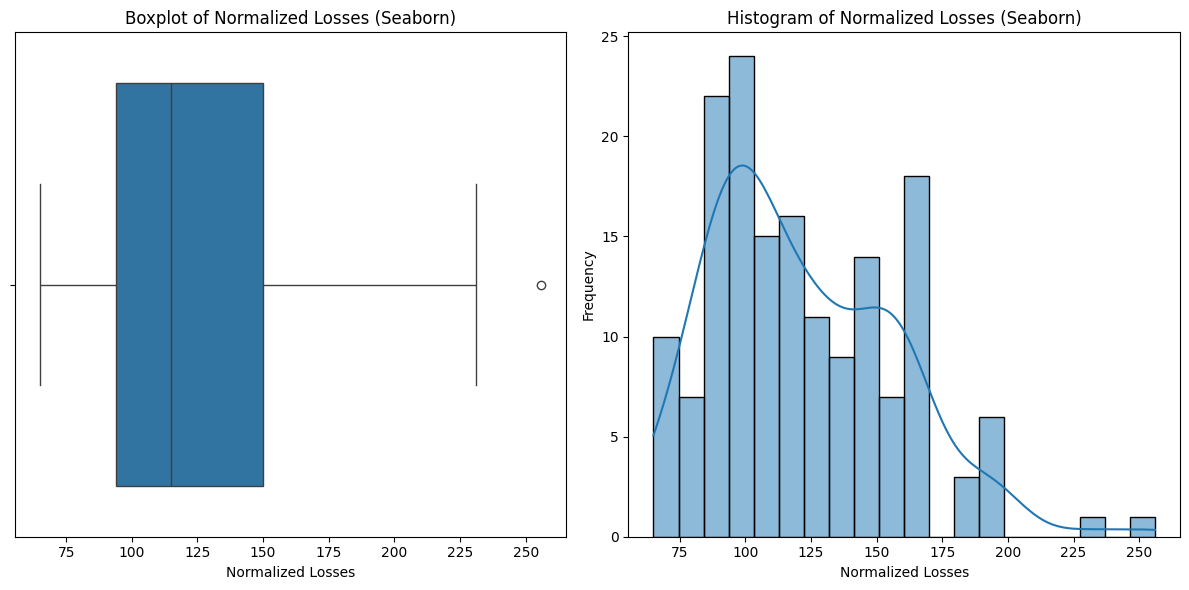

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the boxplot using Seaborn on the first subplot (axes[0])
sns.boxplot(x=df['normalized-losses'].dropna(), ax=axes[0])  
axes[0].set_xlabel('Normalized Losses')  # X-axis label
axes[0].set_title('Boxplot of Normalized Losses (Seaborn)')  # Plot title

# Plotting the histogram using Seaborn on the second subplot (axes[1])
sns.histplot(data=df['normalized-losses'].dropna(), bins=20, kde=True, ax=axes[1]) 
axes[1].set_xlabel('Normalized Losses')  # X-axis label
axes[1].set_ylabel('Frequency')  # Y-axis label
axes[1].set_title('Histogram of Normalized Losses (Seaborn)')  # Plot title

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [16]:
# categorical_cols = ['symboling', 'manufacturer', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style','drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']

numerical_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size','bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg','price']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

In [17]:
from sklearn.linear_model import LinearRegression

df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')

# Separating the dataset into two parts: one with missing values and one without
df_missing = df[df['normalized-losses'].isnull()]
df_not_missing = df[~df['normalized-losses'].isnull()]

# Features and target for the linear regression model
X = df_not_missing.index.values.reshape(-1, 1)  
# Target variable
y = df_not_missing['normalized-losses']  # Target variable

# Create and train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict missing values based on row indices
X_missing = df_missing.index.values.reshape(-1, 1)
predicted_missing = model.predict(X_missing)

# Fill missing values in the 'normalized-losses' column
df.loc[df['normalized-losses'].isnull(), 'normalized-losses'] = predicted_missing

# Show the filled dataset
print(df)

     symboling  normalized-losses manufacturer fuel-type aspiration  \
0            3         139.614398  alfa-romero       gas        std   
1            3         139.450180  alfa-romero       gas        std   
2            1         139.285962  alfa-romero       gas        std   
3            2         164.000000         audi       gas        std   
4            2         164.000000         audi       gas        std   
..         ...                ...          ...       ...        ...   
200         -1          95.000000        volvo       gas        std   
201         -1          95.000000        volvo       gas      turbo   
202         -1          95.000000        volvo       gas        std   
203         -1          95.000000        volvo    diesel      turbo   
204         -1          95.000000        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88

In [18]:
# check the statistics after filling the missing values with regression model
normalized_losses_summary = df['normalized-losses'].describe()
print(normalized_losses_summary)

count    205.000000
mean     122.864148
std       32.016261
min       65.000000
25%      101.000000
50%      121.000000
75%      139.450180
max      256.000000
Name: normalized-losses, dtype: float64


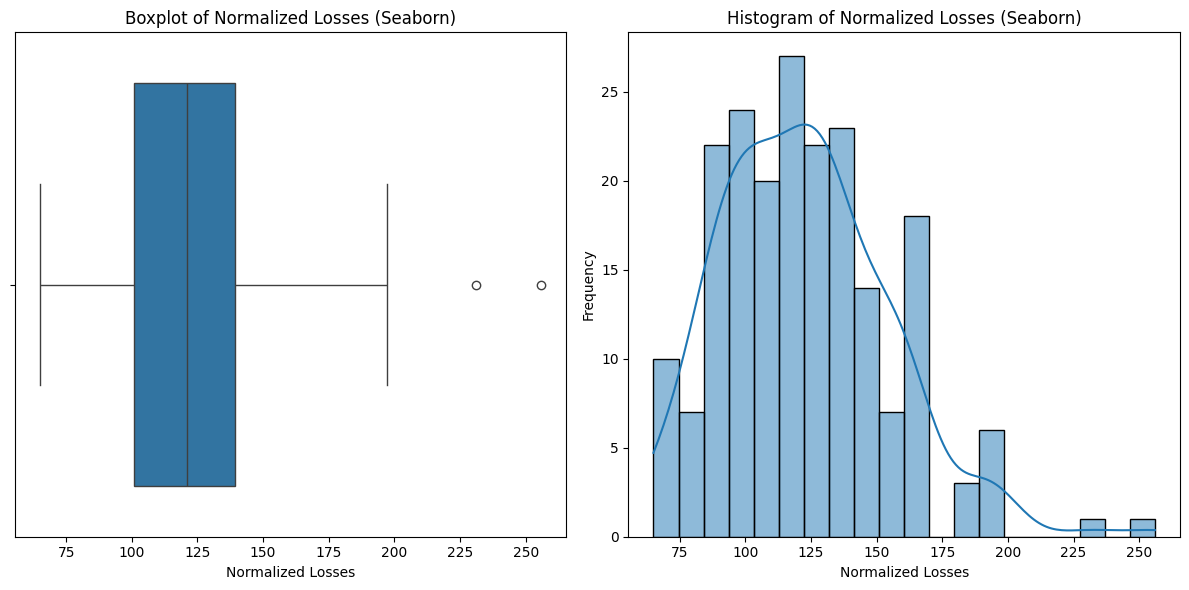

In [19]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the boxplot using Seaborn on the first subplot (axes[0])
sns.boxplot(x=df['normalized-losses'].dropna(), ax=axes[0])  
axes[0].set_xlabel('Normalized Losses')  # X-axis label
axes[0].set_title('Boxplot of Normalized Losses (Seaborn)')  # Plot title

# Plotting the histogram using Seaborn on the second subplot (axes[1])
sns.histplot(data=df['normalized-losses'].dropna(), bins=20, kde=True, ax=axes[1])  
axes[1].set_xlabel('Normalized Losses')  # X-axis label
axes[1].set_ylabel('Frequency')  # Y-axis label
axes[1].set_title('Histogram of Normalized Losses (Seaborn)')  # Plot title

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [20]:
missing_values = df.isnull().sum()
print(missing_values)

symboling            0
normalized-losses    0
manufacturer         0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64


### num-of-doors

In [21]:
print('Missing % of num-of-doors is ', (df['num-of-doors'].isnull().sum()/df.shape[0])*100)

print(df['num-of-doors'].value_counts())

rows_with_null_doors = df[df['num-of-doors'].isnull()]
print(rows_with_null_doors)

Missing % of num-of-doors is  0.975609756097561
num-of-doors
four    114
two      89
Name: count, dtype: int64
    symboling  normalized-losses manufacturer fuel-type aspiration  \
27          1         148.000000        dodge       gas      turbo   
63          0         129.268655        mazda    diesel        std   

   num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
27         <NA>      sedan          fwd           front        93.7  ...   
63         <NA>      sedan          fwd           front        98.8  ...   

    engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
27           98         mpfi  3.03    3.39               7.6      102.0   
63          122          idi  3.39    3.39              22.7       64.0   

    peak-rpm city-mpg  highway-mpg    price  
27    5500.0       24           30   8558.0  
63    4650.0       36           42  10795.0  

[2 rows x 26 columns]


In [22]:
df['num-of-doors'].fillna('4', inplace=True)

missing_values = df.isnull().sum()
print(missing_values)

symboling            0
normalized-losses    0
manufacturer         0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64


### Price

In [23]:
print('Missing % of price is ', (df['price'].isnull().sum()/df.shape[0])*100)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

print(df['price'].value_counts())

rows_with_null_price = df[df['price'].isnull()]
print(rows_with_null_price)

Missing % of price is  1.951219512195122
price
8921.0     2
18150.0    2
8845.0     2
8495.0     2
7609.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: count, Length: 186, dtype: int64
     symboling  normalized-losses manufacturer fuel-type aspiration  \
9            0         138.136435         audi       gas      turbo   
44           1         132.388800        isuzu       gas        std   
45           0         132.224582        isuzu       gas        std   
129          1         118.430258      porsche       gas        std   

    num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
9            two  hatchback          4wd           front        99.5  ...   
44           two      sedan          fwd           front        94.5  ...   
45          four      sedan          fwd           front        94.5  ...   
129          two  hatchback          rwd           front        98.4  ...   

     engine-size  fuel-system

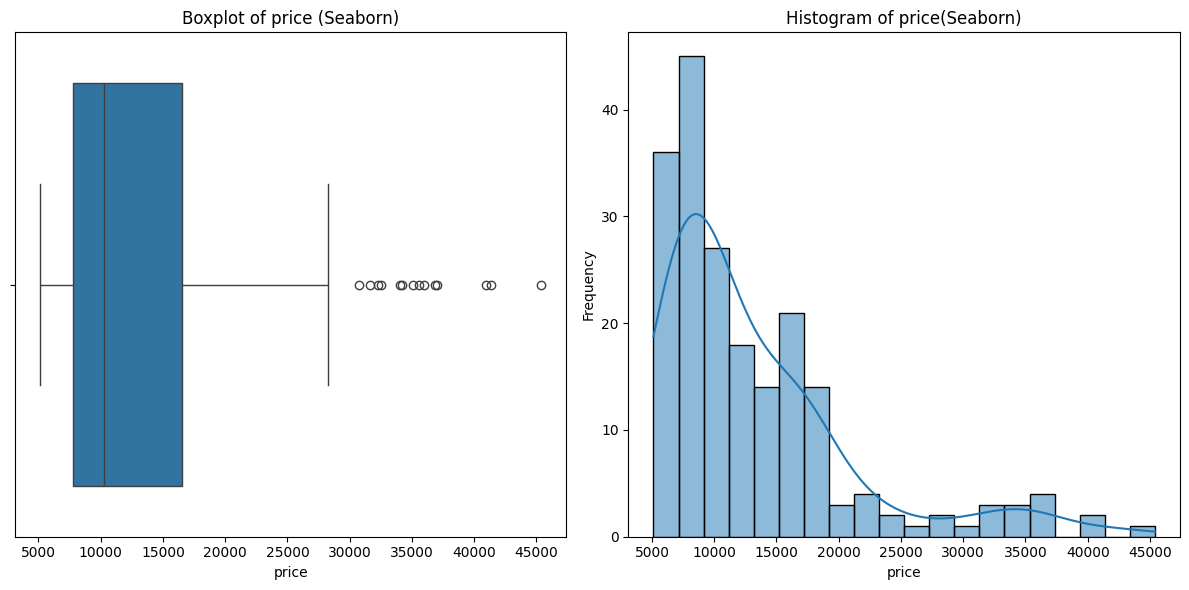

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the boxplot using Seaborn on the first subplot (axes[0])
sns.boxplot(x=df['price'].dropna(), ax=axes[0])  
axes[0].set_xlabel('price')  # X-axis label
axes[0].set_title('Boxplot of price (Seaborn)')  # Plot title

# Plotting the histogram using Seaborn on the second subplot (axes[1])
sns.histplot(data=df['price'].dropna(), bins=20, kde=True, ax=axes[1]) 
axes[1].set_xlabel('price')  # X-axis label
axes[1].set_ylabel('Frequency')  # Y-axis label
axes[1].set_title('Histogram of price(Seaborn)')  # Plot title

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [25]:
df['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

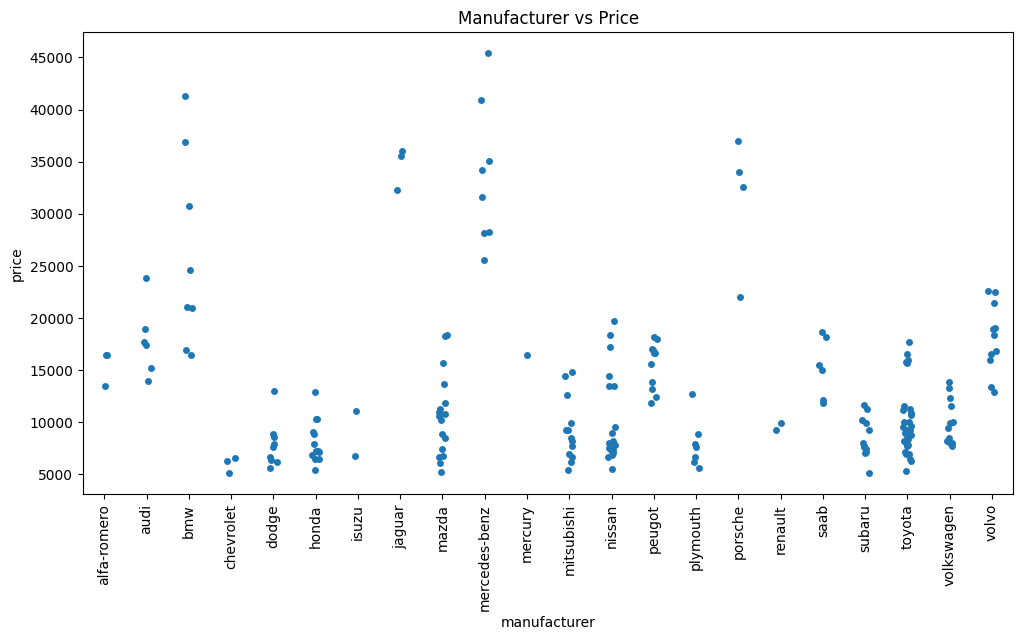

In [26]:
# Create a strip plot for manufacturer vs price
plt.figure(figsize=(12, 6))
sns.stripplot(x='manufacturer', y='price', data=df)
plt.title('Manufacturer vs Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

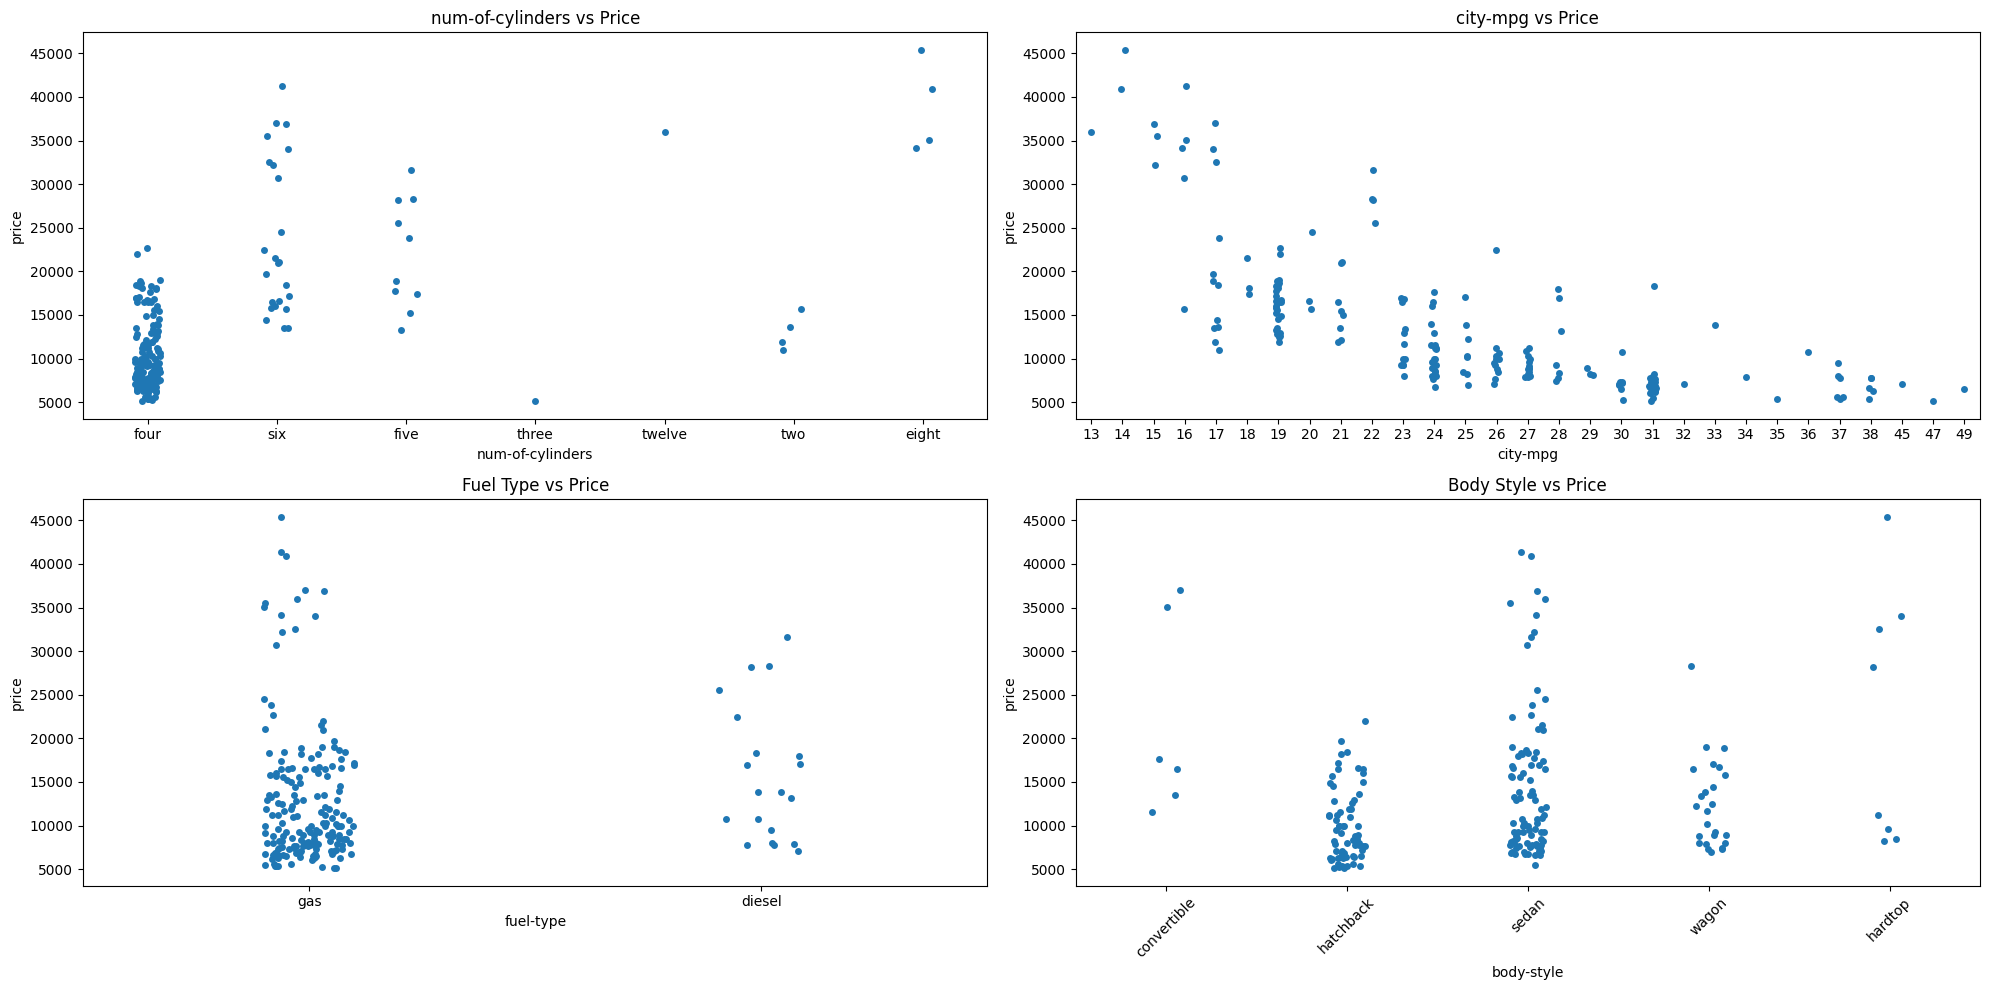

In [27]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Strip plots for num-of-cylinders vs price
sns.stripplot(x='num-of-cylinders', y='price', data=df, ax=axs[0, 0])
axs[0, 0].set_title('num-of-cylinders vs Price')

# Strip plot for manufacturer vs price
sns.stripplot(x='city-mpg', y='price', data=df, ax=axs[0, 1])
axs[0, 1].set_title('city-mpg vs Price')
plt.xticks(rotation=90)

# Strip plot for fuel-type vs price
sns.stripplot(x='fuel-type', y='price', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Fuel Type vs Price')

# Strip plot for body-style vs price
sns.stripplot(x='body-style', y='price', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Body Style vs Price')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Categorical columns and target variable
categorical_cols = ['manufacturer', 'num-of-cylinders', 'fuel-type', 'body-style']
target_variable = 'price'

# Separate data into known prices and missing prices
data_with_prices = df.dropna(subset=[target_variable])
data_missing_prices = df[df[target_variable].isnull()]

# Splitting features and target variable in the known data
X_known = data_with_prices[categorical_cols + ['city-mpg']]
y_known = data_with_prices[target_variable]

# Encoding categorical columns
encoder = LabelEncoder()
for col in categorical_cols:
    X_known[col] = encoder.fit_transform(X_known[col])
    data_missing_prices[col] = encoder.transform(data_missing_prices[col])

# Create your model
your_model = RandomForestRegressor()
your_model.fit(X_known, y_known)

# Predict missing prices using the trained model
predicted_prices = your_model.predict(data_missing_prices[categorical_cols + ['city-mpg']])

# Fill in the missing 'price' values in the original DataFrame
df.loc[df[target_variable].isnull(), target_variable] = predicted_prices

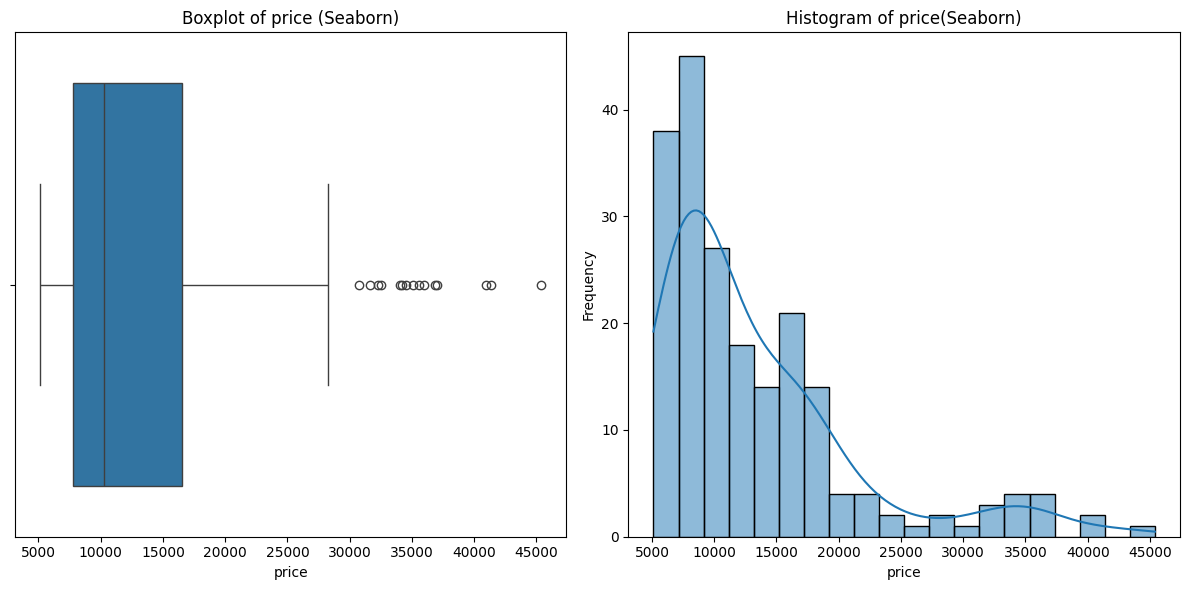

count      205.000000
mean     13287.648015
std       8052.212817
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the boxplot using Seaborn on the first subplot (axes[0])
sns.boxplot(x=df['price'].dropna(), ax=axes[0])  
axes[0].set_xlabel('price')  # X-axis label
axes[0].set_title('Boxplot of price (Seaborn)')  # Plot title

# Plotting the histogram using Seaborn on the second subplot (axes[1])
sns.histplot(data=df['price'].dropna(), bins=20, kde=True, ax=axes[1]) 
axes[1].set_xlabel('price')  # X-axis label
axes[1].set_ylabel('Frequency')  # Y-axis label
axes[1].set_title('Histogram of price(Seaborn)')  # Plot title

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

print(df['price'].describe())

In [30]:
missing_values = df.isnull().sum()
print(missing_values)

symboling            0
normalized-losses    0
manufacturer         0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64


### engine-size, bore and stroke

'Engine-size' typically represents the capacity of an engine in terms of its volume or displacement.

'Bore' refers to the diameter of each cylinder in the engine.

'Stroke' signifies the distance traveled by the piston within the cylinder from top dead center (TDC) to bottom dead center (BDC).

Bore and stroke are typically has 1.95% missing values, 

In [31]:
print('Missing % of bore is ', (df['bore'].isnull().sum()/df.shape[0])*100)
rows_with_null_bore = df[df['bore'].isnull()]
print(rows_with_null_bore)

Missing % of bore is  1.951219512195122
    symboling  normalized-losses manufacturer fuel-type aspiration  \
55          3              150.0        mazda       gas        std   
56          3              150.0        mazda       gas        std   
57          3              150.0        mazda       gas        std   
58          3              150.0        mazda       gas        std   

   num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
55          two  hatchback          rwd           front        95.3  ...   
56          two  hatchback          rwd           front        95.3  ...   
57          two  hatchback          rwd           front        95.3  ...   
58          two  hatchback          rwd           front        95.3  ...   

    engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
55           70         4bbl   NaN     NaN               9.4      101.0   
56           70         4bbl   NaN     NaN               9.4      101.0   
57 

In [32]:
print('Missing % of stroke is ', (df['stroke'].isnull().sum()/df.shape[0])*100)
rows_with_null_stroke = df[df['stroke'].isnull()]
print(rows_with_null_stroke)

Missing % of stroke is  1.951219512195122
    symboling  normalized-losses manufacturer fuel-type aspiration  \
55          3              150.0        mazda       gas        std   
56          3              150.0        mazda       gas        std   
57          3              150.0        mazda       gas        std   
58          3              150.0        mazda       gas        std   

   num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
55          two  hatchback          rwd           front        95.3  ...   
56          two  hatchback          rwd           front        95.3  ...   
57          two  hatchback          rwd           front        95.3  ...   
58          two  hatchback          rwd           front        95.3  ...   

    engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
55           70         4bbl   NaN     NaN               9.4      101.0   
56           70         4bbl   NaN     NaN               9.4      101.0   
5

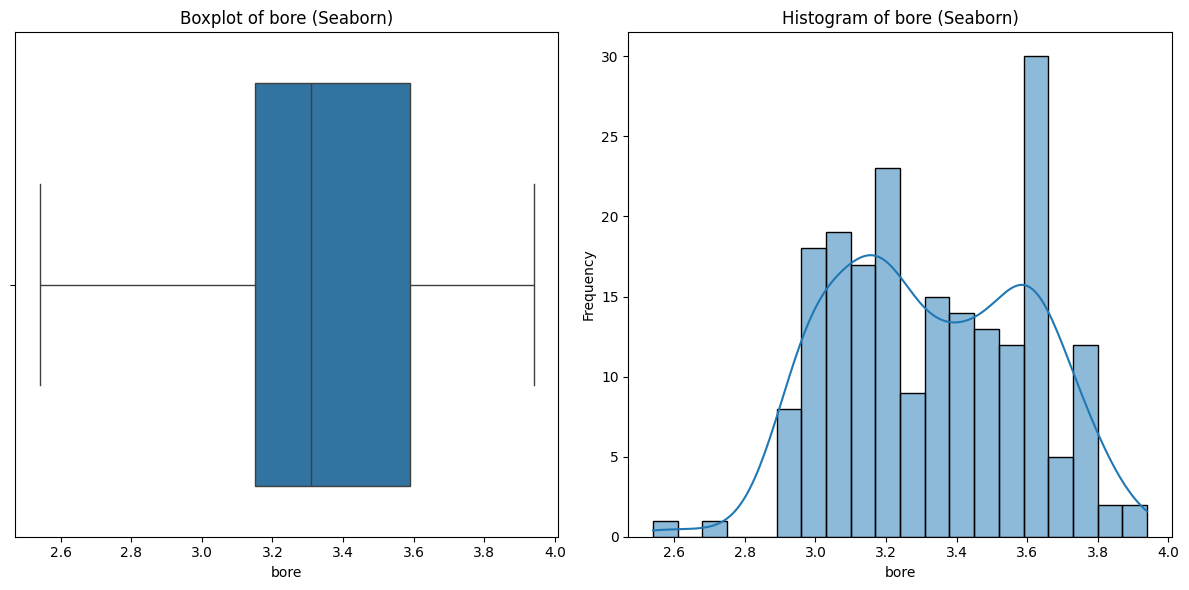

count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the boxplot using Seaborn on the first subplot (axes[0])
sns.boxplot(x=df['bore'].dropna(), ax=axes[0])  
axes[0].set_xlabel('bore')  # X-axis label
axes[0].set_title('Boxplot of bore (Seaborn)')  # Plot title

# Plotting the histogram using Seaborn on the second subplot (axes[1])
sns.histplot(data=df['bore'].dropna(), bins=20, kde=True, ax=axes[1]) 
axes[1].set_xlabel('bore')  # X-axis label
axes[1].set_ylabel('Frequency')  # Y-axis label
axes[1].set_title('Histogram of bore (Seaborn)')  # Plot title

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

df['bore'].describe()

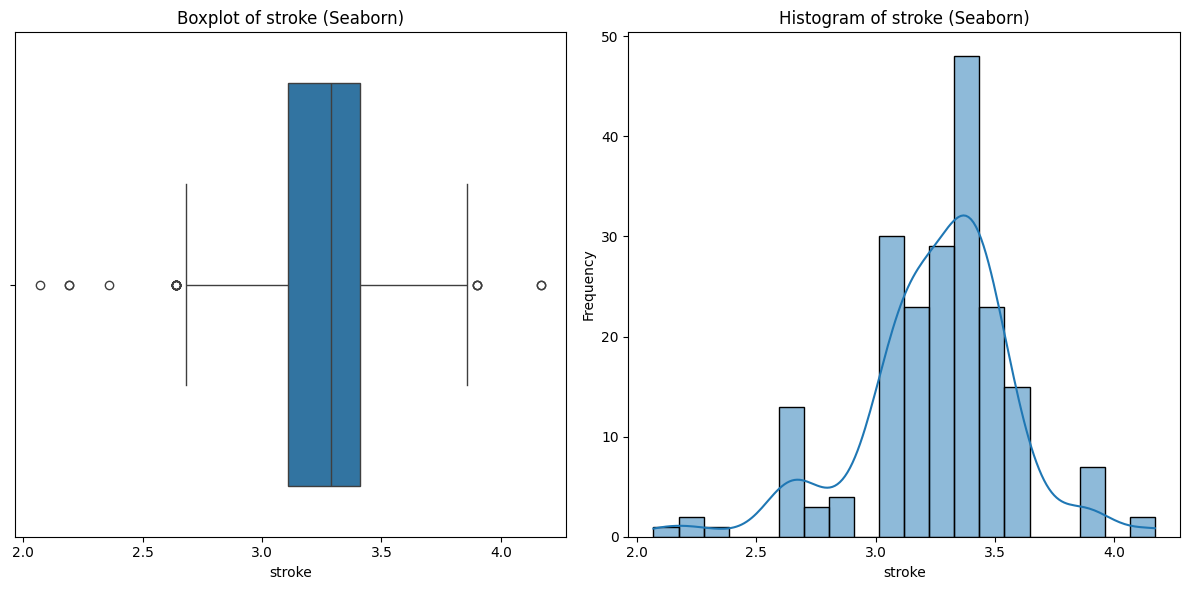

count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the boxplot using Seaborn on the first subplot (axes[0])
sns.boxplot(x=df['stroke'].dropna(), ax=axes[0])  
axes[0].set_xlabel('stroke')  # X-axis label
axes[0].set_title('Boxplot of stroke (Seaborn)')  # Plot title

# Plotting the histogram using Seaborn on the second subplot (axes[1])
sns.histplot(data=df['stroke'].dropna(), bins=20, kde=True, ax=axes[1]) 
axes[1].set_xlabel('stroke')  # X-axis label
axes[1].set_ylabel('Frequency')  # Y-axis label
axes[1].set_title('Histogram of stroke (Seaborn)')  # Plot title

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

df['stroke'].describe()

Although, we have stats, bar and plot we cannot use regression models, after seeing the dataset engine-size determines the stroke and bore. individually we cannot fill the values of the bore and stroke w.r.to engine-size we can fill the values.

In [35]:
numeric_cols = ['engine-size', 'bore', 'stroke']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Calculate mean 'bore' and 'stroke' values based on 'engine-size'
averages = df.groupby('engine-size').agg({'bore': 'mean', 'stroke': 'mean'}).reset_index()

# Merge the means back into the original dataframe
df = pd.merge(df, averages, on='engine-size', suffixes=('', '_mean'))

# Fill missing 'bore' and 'stroke' values based on 'engine-size' means
df['bore'].fillna(df['bore_mean'], inplace=True)
df['stroke'].fillna(df['stroke_mean'], inplace=True)

# Calculate overall mean for 'bore' and 'stroke' columns
overall_mean_bore = df['bore'].mean()
overall_mean_stroke = df['stroke'].mean()

# Fill remaining missing 'bore' and 'stroke' values with overall means
df['bore'].fillna(overall_mean_bore, inplace=True)
df['stroke'].fillna(overall_mean_stroke, inplace=True)

# Drop the additional mean columns used for calculations
df.drop(['bore_mean', 'stroke_mean'], axis=1, inplace=True)

print(df)

     symboling  normalized-losses manufacturer fuel-type aspiration  \
0            3         139.614398  alfa-romero       gas        std   
1            3         139.450180  alfa-romero       gas        std   
2           -2         103.000000        volvo       gas      turbo   
3           -1          74.000000        volvo       gas      turbo   
4            1         139.285962  alfa-romero       gas        std   
..         ...                ...          ...       ...        ...   
200         -1          95.000000        volvo       gas        std   
201         -1          95.000000        volvo       gas      turbo   
202         -1          95.000000        volvo       gas      turbo   
203         -1          95.000000        volvo       gas        std   
204         -1          95.000000        volvo    diesel      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88

In [36]:
missing_values = df.isnull().sum()
print(missing_values)

symboling            0
normalized-losses    0
manufacturer         0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64


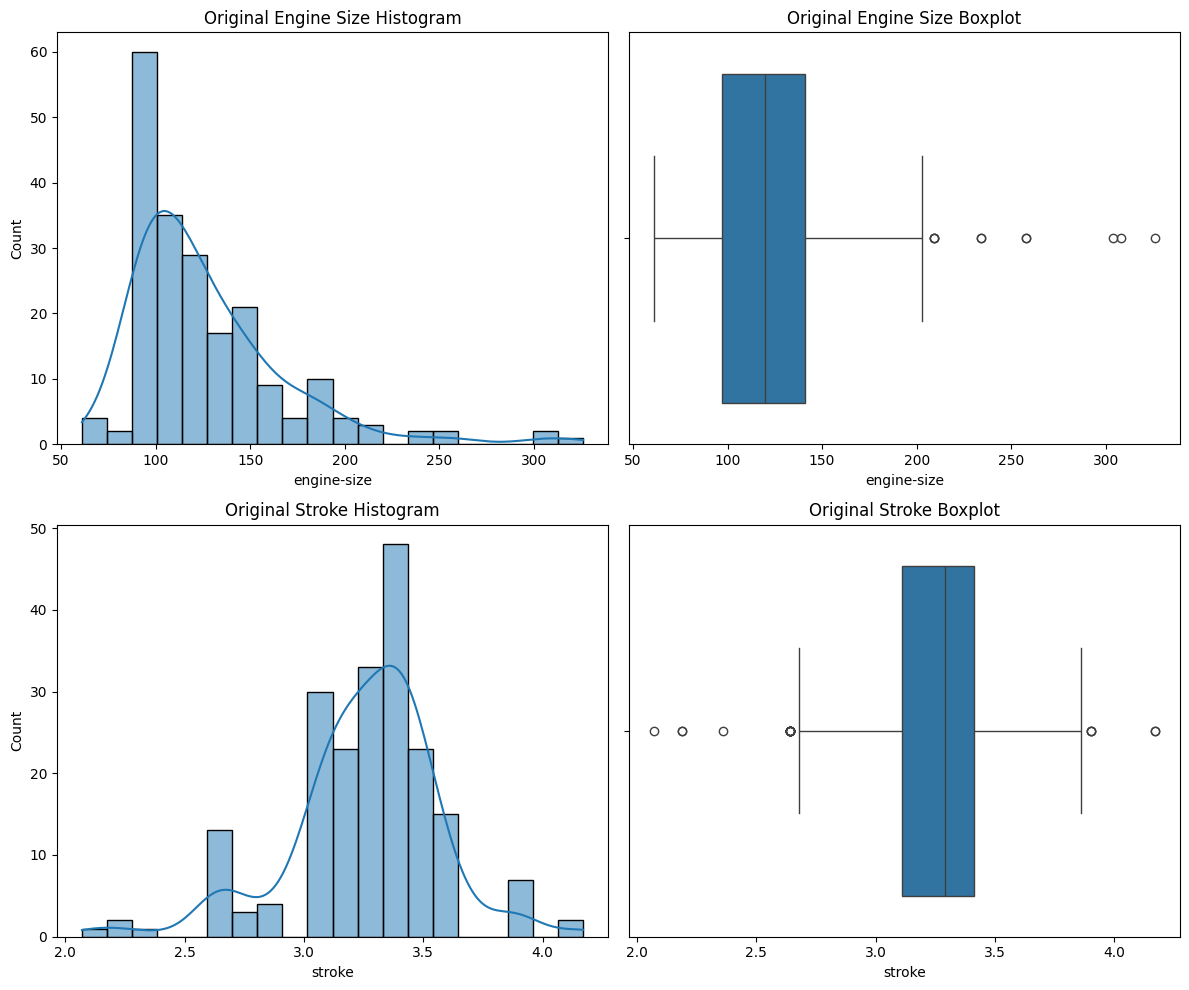

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine-size, dtype: float64
count    205.000000
mean       3.255423
std        0.313597
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64


In [37]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Original Data Visualization using Seaborn
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for engine-size
sns.histplot(df['engine-size'], bins=20, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Original Engine Size Histogram')

# Boxplot for engine-size
sns.boxplot(x=df['engine-size'], ax=axs[0, 1])
axs[0, 1].set_title('Original Engine Size Boxplot')

# Histogram for stroke
sns.histplot(df['stroke'].dropna(), bins=20, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Original Stroke Histogram')

# Boxplot for stroke
sns.boxplot(x=df['stroke'].dropna(), ax=axs[1, 1])
axs[1, 1].set_title('Original Stroke Boxplot')

plt.tight_layout()
plt.show()

print(df['engine-size'].describe())
print(df['stroke'].describe())

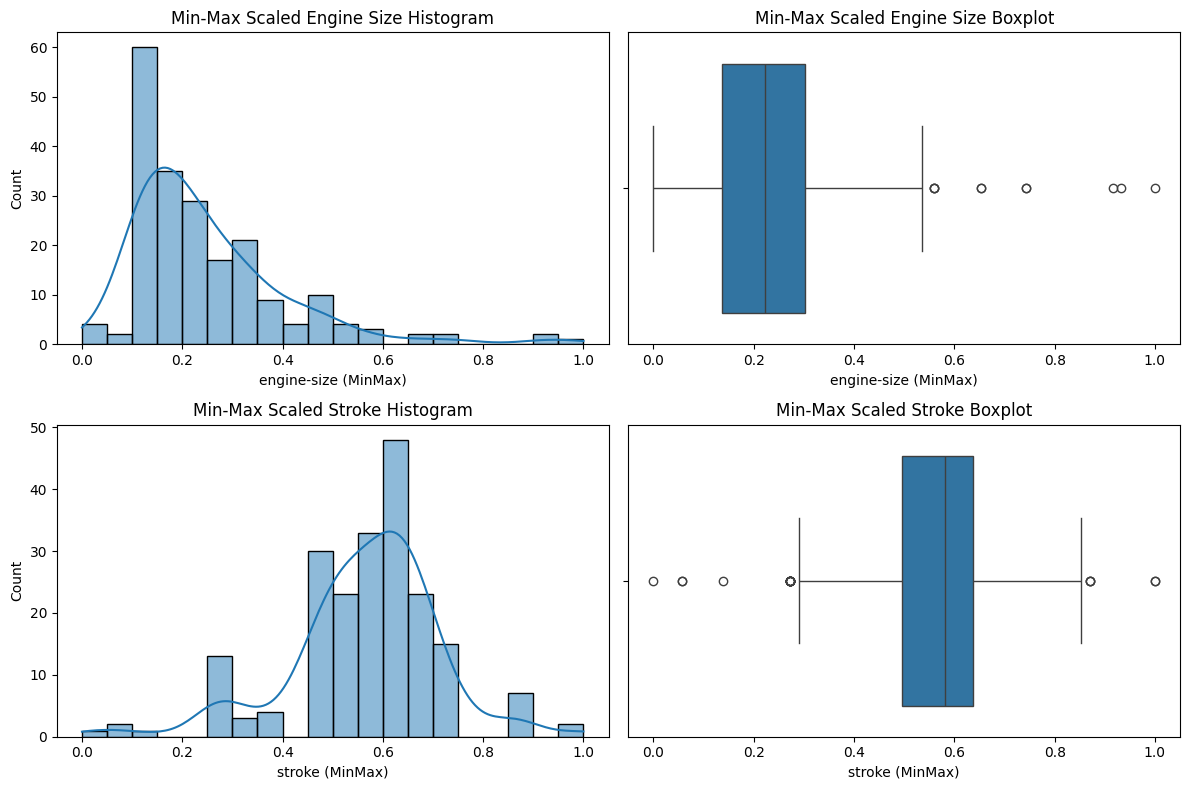

count    205.000000
mean       0.248707
std        0.157142
min        0.000000
25%        0.135849
50%        0.222642
75%        0.301887
max        1.000000
Name: engine-size (MinMax), dtype: float64
count    205.000000
mean       0.564487
std        0.149332
min        0.000000
25%        0.495238
50%        0.580952
75%        0.638095
max        1.000000
Name: stroke (MinMax), dtype: float64


In [38]:
# Feature Scaling - Min-Max Scaling
data_to_scale = df[['engine-size', 'stroke']].dropna()

minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(data_to_scale)
minmax_scaled_df = pd.DataFrame(minmax_scaled_data, columns=['engine-size (MinMax)', 'stroke (MinMax)'])

# Scaled Data Visualization using Seaborn
fig, axs_scaled = plt.subplots(2, 2, figsize=(12, 8))

# Histogram for Min-Max Scaled engine-size
sns.histplot(minmax_scaled_df['engine-size (MinMax)'], bins=20, kde=True, ax=axs_scaled[0, 0])
axs_scaled[0, 0].set_title('Min-Max Scaled Engine Size Histogram')

# Boxplot for Min-Max Scaled engine-size
sns.boxplot(x=minmax_scaled_df['engine-size (MinMax)'], ax=axs_scaled[0, 1])
axs_scaled[0, 1].set_title('Min-Max Scaled Engine Size Boxplot')

# Histogram for Min-Max Scaled stroke
sns.histplot(minmax_scaled_df['stroke (MinMax)'], bins=20, kde=True, ax=axs_scaled[1, 0])
axs_scaled[1, 0].set_title('Min-Max Scaled Stroke Histogram')

# Boxplot for Min-Max Scaled stroke
sns.boxplot(x=minmax_scaled_df['stroke (MinMax)'], ax=axs_scaled[1, 1])
axs_scaled[1, 1].set_title('Min-Max Scaled Stroke Boxplot')

plt.tight_layout()
plt.show()

print(minmax_scaled_df['engine-size (MinMax)'].describe())
print(minmax_scaled_df['stroke (MinMax)'].describe())

### Min-Max Scaling:

The Min-Max scaling method compresses the 'stroke' values between 0 and 1. This transformation makes the variable's range consistent and appropriate for algorithms sensitive to varying scales.
As we can see, it has normal distribution over the stroke values where as in engine-size it is positive-skew curve.

The distribution is uniformly scaled within the range of 0 to 1, maintaining the original data's shape but constraining it within a specific interval.

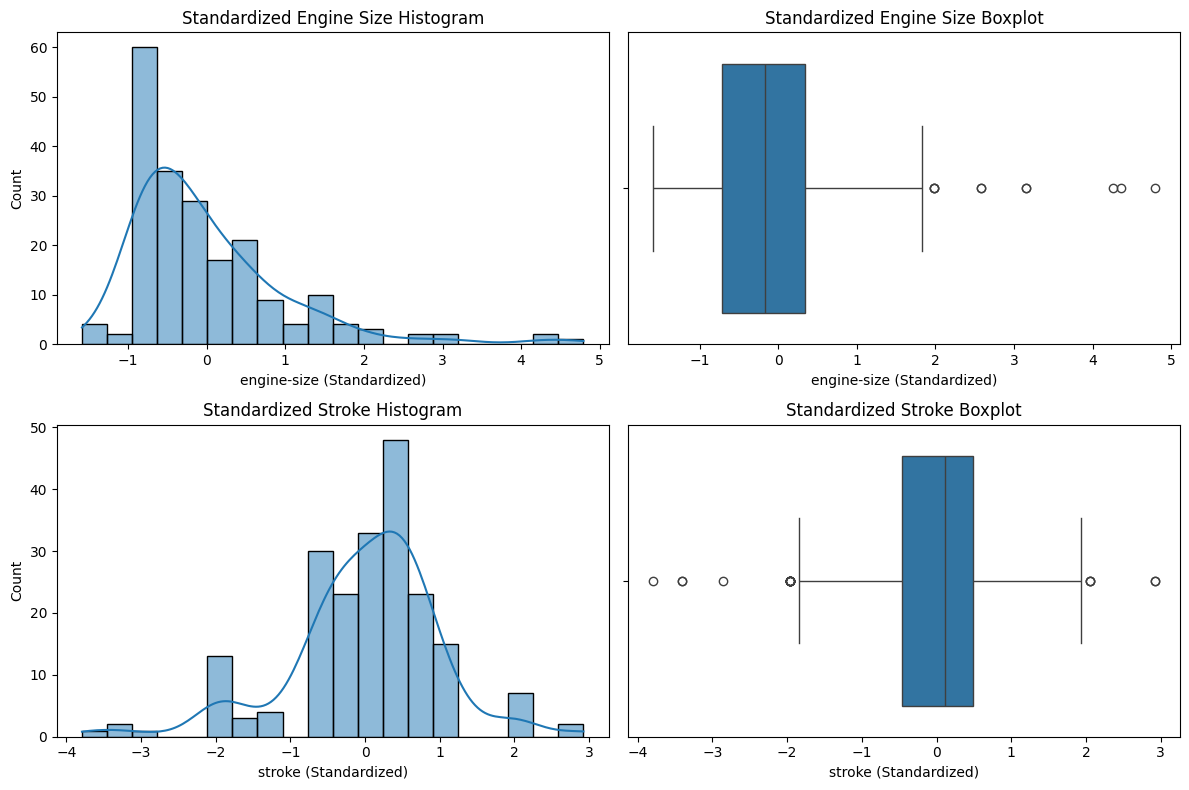

count    2.050000e+02
mean     3.466062e-17
std      1.002448e+00
min     -1.586561e+00
25%     -7.199469e-01
50%     -1.662771e-01
75%      3.392475e-01
max      4.792679e+00
Name: engine-size (Standardized), dtype: float64
count    2.050000e+02
mean     2.350423e-15
std      1.002448e+00
min     -3.789337e+00
25%     -4.648606e-01
50%      1.105296e-01
75%      4.941231e-01
max      2.923548e+00
Name: stroke (Standardized), dtype: float64


In [39]:
data_to_scale = df[['engine-size', 'stroke']].dropna()

standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(data_to_scale)
standard_scaled_df = pd.DataFrame(standard_scaled_data, columns=['engine-size (Standardized)', 'stroke (Standardized)'])

# Scaled Data Visualization using Seaborn
fig, axs_scaled = plt.subplots(2, 2, figsize=(12, 8))

# Histogram with KDE for Standardized engine-size
sns.histplot(standard_scaled_df['engine-size (Standardized)'], bins=20, kde=True, ax=axs_scaled[0, 0])
axs_scaled[0, 0].set_title('Standardized Engine Size Histogram')

# Histogram with KDE for Standardized stroke
sns.histplot(standard_scaled_df['stroke (Standardized)'], bins=20, kde=True, ax=axs_scaled[1, 0])
axs_scaled[1, 0].set_title('Standardized Stroke Histogram')

# Boxplot for Standardized engine-size
sns.boxplot(x=standard_scaled_df['engine-size (Standardized)'], ax=axs_scaled[0, 1])
axs_scaled[0, 1].set_title('Standardized Engine Size Boxplot')

# Boxplot for Standardized stroke
sns.boxplot(x=standard_scaled_df['stroke (Standardized)'], ax=axs_scaled[1, 1])
axs_scaled[1, 1].set_title('Standardized Stroke Boxplot')

plt.tight_layout()
plt.show()

print(standard_scaled_df['engine-size (Standardized)'].describe())
print(standard_scaled_df['stroke (Standardized)'].describe())

### Standardization:

Standardization centers the 'stroke' values around a mean close to zero and scales them to have a standard deviation of around 1.

The variable is transformed to have a mean close to zero, resulting in negative and positive values that indicate how many standard deviations each value is from the mean. 
The range is not limited, which can capture outliers effectively.

### engine size:
1. The data has a positive skew, indicated by a longer tail on the right side of the distribution.
2. Majority of engine sizes are around the range of 97 to 141 (25th to 75th percentile), with a few higher values ranging up to 326 (max).
3. The right-skewed shape suggests that there are fewer instances of very high engine sizes compared to smaller engine sizes.
4. This skewed shape may indicate the presence of a few larger engines in the dataset, while the majority of vehicles tend to have smaller engine sizes.

### stroke:
1. The distribution is more balanced and closer to a normal distribution, implying a more uniform spread of stroke values across vehicles.
2. Vehicles in the dataset tend to have stroke measurements clustered around a specific range, with relatively less variability compared to engine sizes.
3. The data follows a near normal distribution, as indicated by the symmetrical bell-shaped curve with no significant skewness.
4. Most stroke values fall within a relatively narrow range between 2.07 and 4.17 with a mean of 3.26.


The effectiveness of feature scaling in altering the distribution of data is limited to modifying the spread, center, and range of the values. It might not significantly impact the underlying 
shape of the distribution. If the initial data distribution is positively skewed or has a particular shape, feature scaling alone might not alter this fundamental shape, especially with techniques like Min-Max Scaling or Standardization. If the data initially follows a normal or near-normal distribution, applying feature scaling might maintain this shape or make the distribution more symmetrical around the mean. However, for highly skewed or multi-modal distributions, feature scaling might not fundamentally change these characteristics.

### symboling, make, and engine-type

In [40]:
# Convert Symboling to a categorical type preserving order
# label-encoding
symboling_categories = [-3, -2, -1, 0, 1, 2, 3]
df['symboling'] = pd.Categorical(df['symboling'], categories=symboling_categories, ordered=True)
df['symboling_encoded'] = df['symboling'].cat.codes

# Apply one-hot encoding for Make and Engine-type
df_encoding = pd.get_dummies(df, columns=['manufacturer', 'engine-type'])

print(df_encoding)

    symboling  normalized-losses fuel-type aspiration num-of-doors  \
0           3         139.614398       gas        std          two   
1           3         139.450180       gas        std          two   
2          -2         103.000000       gas      turbo         four   
3          -1          74.000000       gas      turbo         four   
4           1         139.285962       gas        std          two   
..        ...                ...       ...        ...          ...   
200        -1          95.000000       gas        std         four   
201        -1          95.000000       gas      turbo         four   
202        -1          95.000000       gas      turbo         four   
203        -1          95.000000       gas        std         four   
204        -1          95.000000    diesel      turbo         four   

      body-style drive-wheels engine-location  wheel-base  length  ...  \
0    convertible          rwd           front        88.6   168.8  ...   
1    conver

In [41]:
df.isnull().sum()

symboling            0
normalized-losses    0
manufacturer         0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
symboling_encoded    0
dtype: int64

### horsepower and peak-rpm

horsepower' and 'peak-rpm' variables can be influenced by several factors, but importantly on 'engine-size', 'num-of-cylinders', and 'compression-ratio'

Missing % of horsepower is  0.975609756097561
    symboling  normalized-losses manufacturer fuel-type aspiration  \
178         0         118.266040      renault       gas        std   
179         2         118.101822      renault       gas        std   

    num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
178         four      wagon          fwd           front        96.1  ...   
179          two  hatchback          fwd           front        96.1  ...   

     fuel-system  bore  stroke  compression-ratio horsepower peak-rpm  \
178         mpfi  3.46     3.9                8.7        NaN      NaN   
179         mpfi  3.46     3.9                8.7        NaN      NaN   

     city-mpg highway-mpg   price  symboling_encoded  
178        23          31  9295.0                  3  
179        23          31  9895.0                  5  

[2 rows x 27 columns]


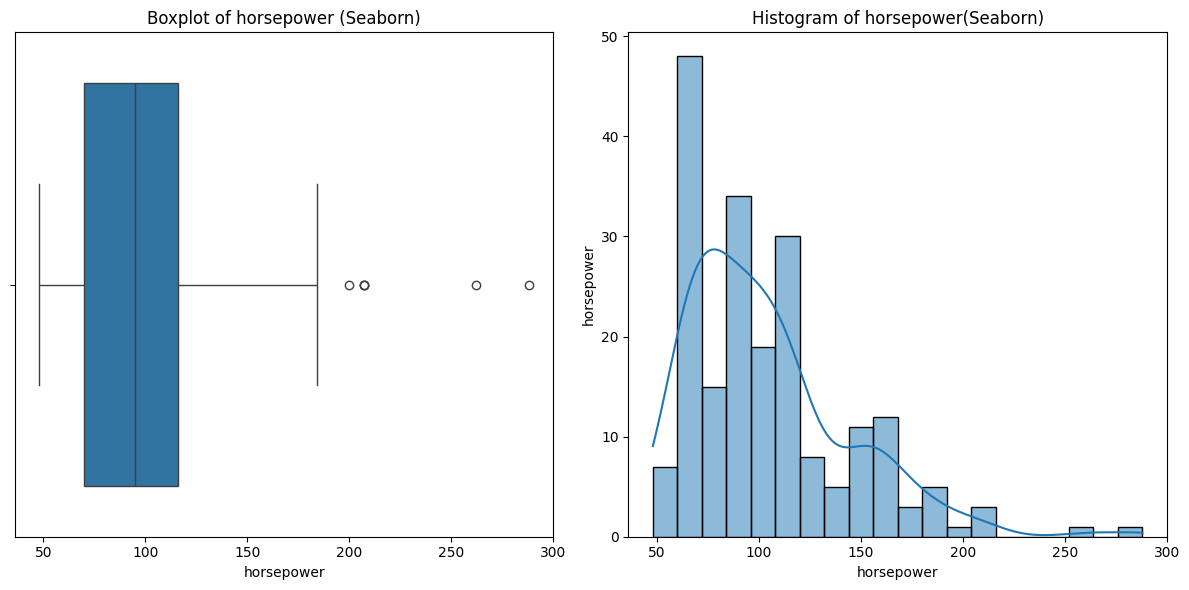

count      205.000000
mean     13287.648015
std       8052.212817
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [42]:
print('Missing % of horsepower is ', (df['horsepower'].isnull().sum()/df.shape[0])*100)
rows_with_null_horsepower = df[df['horsepower'].isnull()]
print(rows_with_null_horsepower)

df.replace('?', np.nan, inplace = True)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the boxplot using Seaborn on the first subplot (axes[0])
sns.boxplot(x=df['horsepower'].dropna(), ax=axes[0])  
axes[0].set_xlabel('horsepower')  # X-axis label
axes[0].set_title('Boxplot of horsepower (Seaborn)')  # Plot title

# Plotting the histogram using Seaborn on the second subplot (axes[1])
sns.histplot(data=df['horsepower'].dropna(), bins=20, kde=True, ax=axes[1]) 
axes[1].set_xlabel('horsepower')  # X-axis label
axes[1].set_ylabel('horsepower')  # Y-axis label
axes[1].set_title('Histogram of horsepower(Seaborn)')  # Plot title

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

print(df['price'].describe())

Missing % of peak-rpm is  0.975609756097561
    symboling  normalized-losses manufacturer fuel-type aspiration  \
178         0         118.266040      renault       gas        std   
179         2         118.101822      renault       gas        std   

    num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
178         four      wagon          fwd           front        96.1  ...   
179          two  hatchback          fwd           front        96.1  ...   

     fuel-system  bore  stroke  compression-ratio horsepower peak-rpm  \
178         mpfi  3.46     3.9                8.7        NaN      NaN   
179         mpfi  3.46     3.9                8.7        NaN      NaN   

     city-mpg highway-mpg   price  symboling_encoded  
178        23          31  9295.0                  3  
179        23          31  9895.0                  5  

[2 rows x 27 columns]


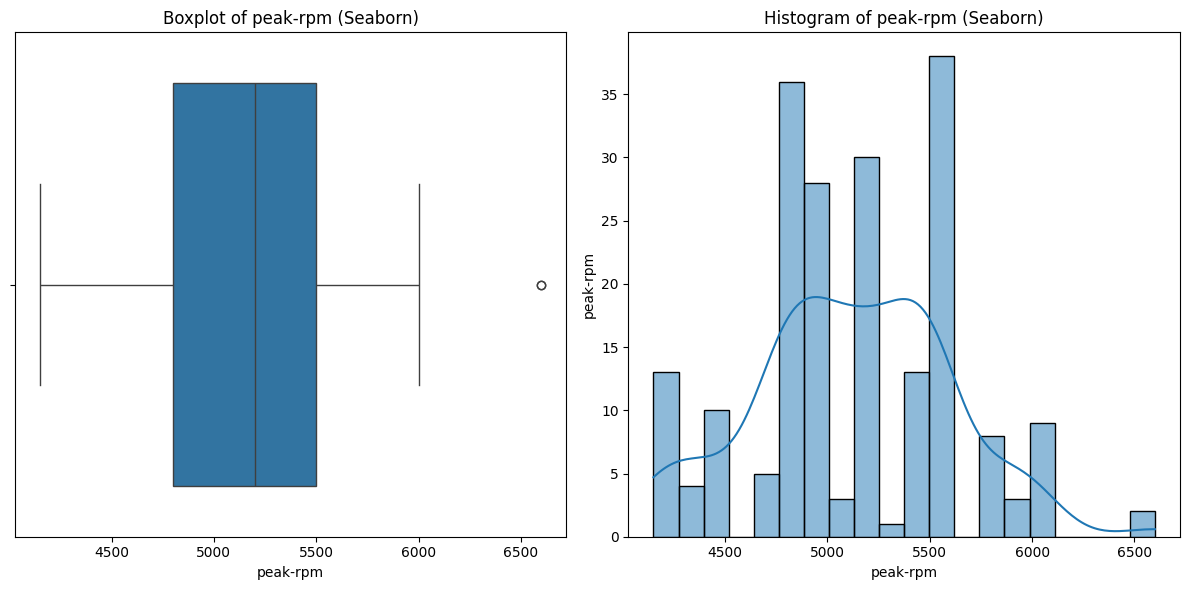

count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64


In [43]:
print('Missing % of peak-rpm is ', (df['peak-rpm'].isnull().sum()/df.shape[0])*100)
rows_with_null_peak_rpm = df[df['peak-rpm'].isnull()]
print(rows_with_null_peak_rpm)

df.replace('?', np.nan, inplace = True)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the boxplot using Seaborn on the first subplot (axes[0])
sns.boxplot(x=df['peak-rpm'].dropna(), ax=axes[0])  
axes[0].set_xlabel('peak-rpm')  # X-axis label
axes[0].set_title('Boxplot of peak-rpm (Seaborn)')  # Plot title

# Plotting the histogram using Seaborn on the second subplot (axes[1])
sns.histplot(data=df['peak-rpm'].dropna(), bins=20, kde=True, ax=axes[1]) 
axes[1].set_xlabel('peak-rpm')  # X-axis label
axes[1].set_ylabel('peak-rpm')  # Y-axis label
axes[1].set_title('Histogram of peak-rpm (Seaborn)')  # Plot title

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

print(df['peak-rpm'].describe())

In [44]:
grouped_data1 = df.groupby('num-of-cylinders')[['horsepower', 'peak-rpm']].median().reset_index()

# Fill missing values using median values based on 'num-of-cylinders'
df = df.merge(grouped_data1, on='num-of-cylinders', suffixes=('', '_median'))

# Fill missing values in 'horsepower' and 'peak-rpm' columns
df['horsepower'].fillna(df['horsepower_median'], inplace=True)
df['peak-rpm'].fillna(df['peak-rpm_median'], inplace=True)

print(df)

    symboling  normalized-losses   manufacturer fuel-type aspiration  \
0           3         139.614398    alfa-romero       gas        std   
1           3         139.450180    alfa-romero       gas        std   
2          -2         103.000000          volvo       gas      turbo   
3          -1          74.000000          volvo       gas      turbo   
4           0         161.000000         peugot    diesel      turbo   
..        ...                ...            ...       ...        ...   
200        -1         127.954910  mercedes-benz       gas        std   
201         3         142.000000  mercedes-benz       gas        std   
202         0         127.626474  mercedes-benz       gas        std   
203         1         127.462256  mercedes-benz       gas        std   
204         1         118.430258        porsche       gas        std   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           fro

In [45]:
missing_values = df.isnull().sum()
print(missing_values)

symboling            0
normalized-losses    0
manufacturer         0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
symboling_encoded    0
horsepower_median    0
peak-rpm_median      0
dtype: int64


Data cleaning has been performed successfully we are now good to perform EDA analysis.

### Principal Component Analysis (PCA) 

It is a dimensionality reduction technique used to transform a dataset into a new coordinate system, reducing the number of dimensions while retaining most of the original information.

In [46]:
from sklearn.decomposition import PCA

selected_columns = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size','compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg']

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[selected_columns])

# PCA transformation
pca = PCA()
pca.fit(scaled_data)

# Number of components to retain most variance
n_components = 10
pca = PCA(n_components=n_components)
pca_components = pca.fit_transform(scaled_data)

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_
total_variance_explained = sum(explained_variance) * 100

# Creating a DataFrame for the new components
pca_columns = [f'Component_{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(data=pca_components, columns=pca_columns)

# Explained Variance Ratio for each component
for i in range(n_components):
    print(f"Variance explained by {pca_columns[i]}: {explained_variance[i] * 100:.2f}%")

# Results
print(f"Total variance explained by {n_components} components: {total_variance_explained:.2f}%")

Variance explained by Component_1: 54.62%
Variance explained by Component_2: 21.51%
Variance explained by Component_3: 9.19%
Variance explained by Component_4: 5.85%
Variance explained by Component_5: 3.09%
Variance explained by Component_6: 2.29%
Variance explained by Component_7: 1.34%
Variance explained by Component_8: 0.83%
Variance explained by Component_9: 0.78%
Variance explained by Component_10: 0.51%
Total variance explained by 10 components: 100.00%


In [47]:
selected_variables = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg']
data_subset = df[selected_variables]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the principal components
columns = [i+1 for i in range(principal_components.shape[1])]
pc_df = pd.DataFrame(data=principal_components, columns=columns)

# Display the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio- \n", explained_variance_ratio)

# Display the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative of Explained Variance:- \n", cumulative_explained_variance)

# Display the principal components DataFrame
pc_df.head()

Explained Variance Ratio- 
 [0.54622157 0.21505297 0.09189014 0.0584819  0.03091156 0.02288969
 0.0133845  0.00830213 0.00778788 0.00507767]
Cumulative of Explained Variance:- 
 [0.54622157 0.76127454 0.85316467 0.91164657 0.94255813 0.96544782
 0.97883232 0.98713445 0.99492233 1.        ]


,1,2,3,4,5,6,7,8,9,10
0,-1.115532,-1.671749,1.617098,-0.601284,-0.119470,-1.035703,-0.284914,-0.422149,0.206725,0.193191
1,-1.115532,-1.671749,1.617098,-0.601284,-0.119470,-1.035703,-0.284914,-0.422149,0.206725,0.193191
2,2.482643,-0.508025,-1.122590,-0.280895,0.303363,-0.483016,0.212710,0.111320,-0.786967,0.045790
3,2.655395,-0.281502,-1.434701,-0.296126,0.627714,-0.497659,0.308847,0.141024,-0.709506,0.220670
4,2.494304,3.499901,1.112898,0.482320,0.052693,-0.200630,0.052390,0.206519,-0.011010,0.102160


## EDA

In [48]:
final_df = df.drop(columns=['symboling_encoded', 'horsepower_median', 'peak-rpm_median'])
print(final_df)

    symboling  normalized-losses   manufacturer fuel-type aspiration  \
0           3         139.614398    alfa-romero       gas        std   
1           3         139.450180    alfa-romero       gas        std   
2          -2         103.000000          volvo       gas      turbo   
3          -1          74.000000          volvo       gas      turbo   
4           0         161.000000         peugot    diesel      turbo   
..        ...                ...            ...       ...        ...   
200        -1         127.954910  mercedes-benz       gas        std   
201         3         142.000000  mercedes-benz       gas        std   
202         0         127.626474  mercedes-benz       gas        std   
203         1         127.462256  mercedes-benz       gas        std   
204         1         118.430258        porsche       gas        std   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           fro

In [49]:
print(final_df.info())
print(final_df.describe())
print(final_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          205 non-null    category
 1   normalized-losses  205 non-null    float64 
 2   manufacturer       205 non-null    object  
 3   fuel-type          205 non-null    object  
 4   aspiration         205 non-null    object  
 5   num-of-doors       205 non-null    object  
 6   body-style         205 non-null    object  
 7   drive-wheels       205 non-null    object  
 8   engine-location    205 non-null    object  
 9   wheel-base         205 non-null    float64 
 10  length             205 non-null    float64 
 11  width              205 non-null    float64 
 12  height             205 non-null    float64 
 13  curb-weight        205 non-null    int64   
 14  engine-type        205 non-null    object  
 15  num-of-cylinders   205 non-null    object  
 16  engine-s

### Univariate Analysis

#### Categorical variables

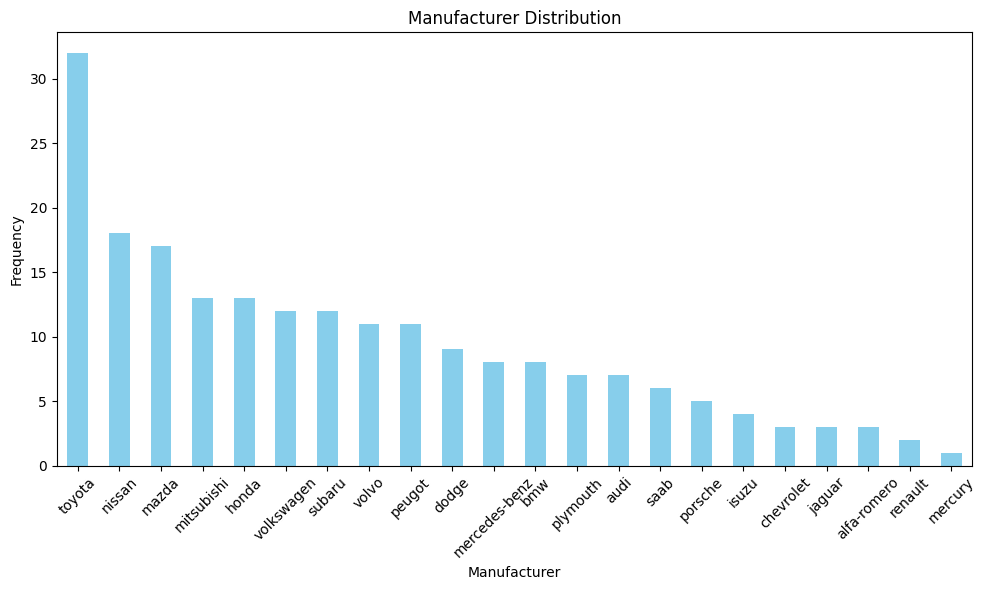

In [50]:
# Explore manufacturer distribution
manufacturer_counts = final_df['manufacturer'].value_counts()

plt.figure(figsize=(10, 6))
manufacturer_counts.plot(kind='bar', color='skyblue')
plt.title('Manufacturer Distribution')
plt.xlabel('Manufacturer')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see clearly that toyota is used by most of the customers as per dataset. However we can further investigate what made to customers opt toyata and least used is mercury.

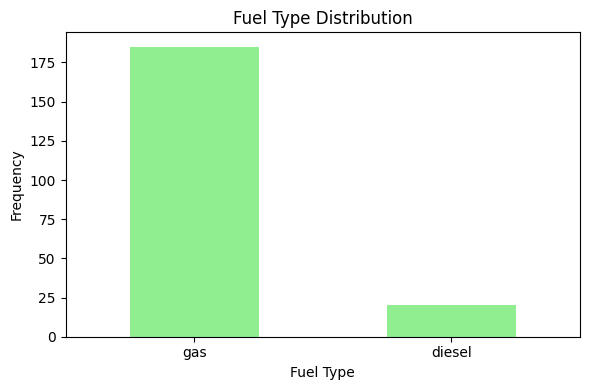

In [51]:
# Explore fuel type distribution
fuel_type_counts = final_df['fuel-type'].value_counts()

plt.figure(figsize=(6, 4))
fuel_type_counts.plot(kind='bar', color='lightgreen')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Most of the cars are operated by gas rather than diesel, it's clearly evident that most car manufacturers are inclined towards gas usage engines.

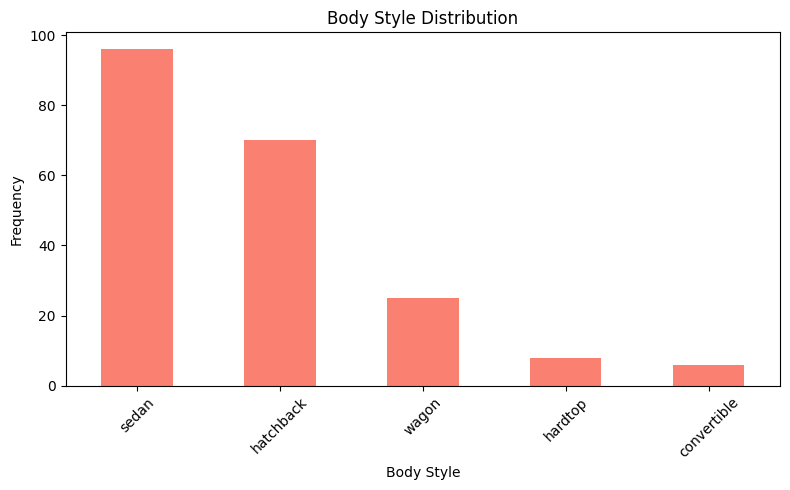

In [52]:
# Explore body style distribution
body_style_counts = final_df['body-style'].value_counts()

plt.figure(figsize=(8, 5))
body_style_counts.plot(kind='bar', color='salmon')
plt.title('Body Style Distribution')
plt.xlabel('Body Style')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here is the demographics of the sedan population is highest among the manufacturers due to the engine, the area for passengers, and the trunk features of the car, which in contrast they prefer less for convertible body style cars.

#### Numerical variables

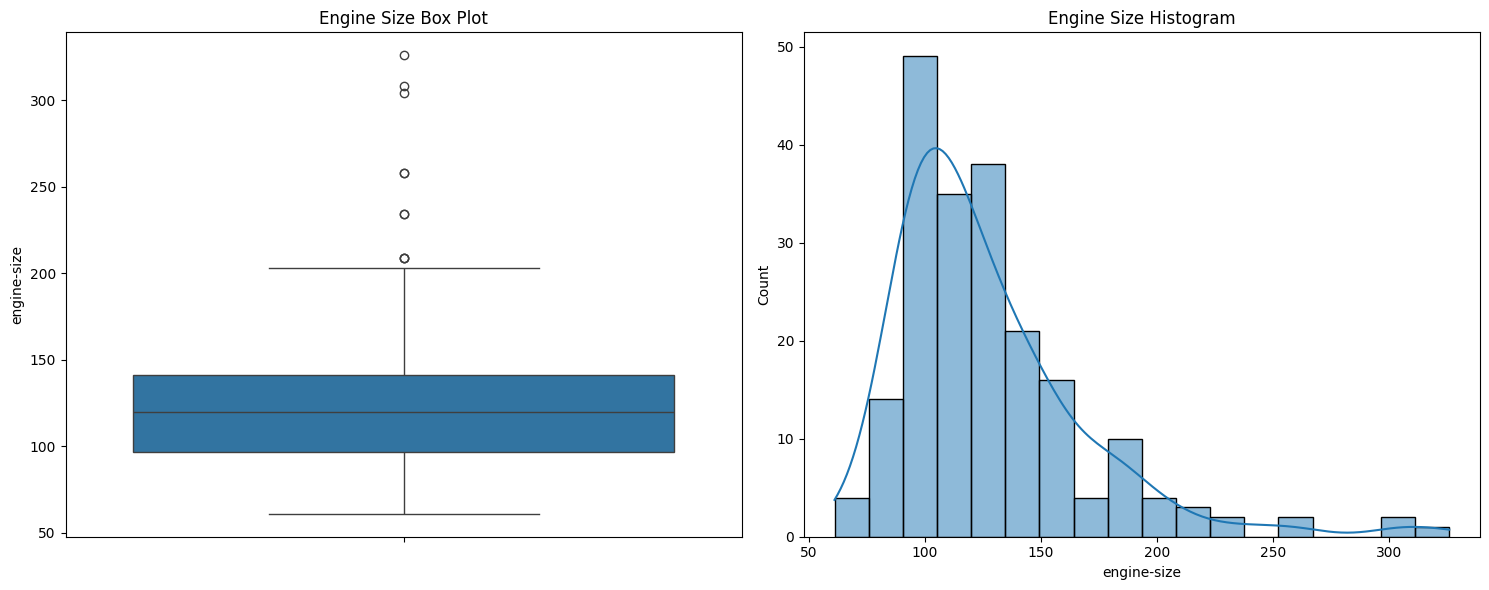

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine-size, dtype: float64


In [53]:
# Create a figure and axis objects with subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Engine Size Box Plot
sns.boxplot(y='engine-size', data=final_df, ax=axs[0])
axs[0].set_title('Engine Size Box Plot')

# Engine Size Histogram
sns.histplot(final_df['engine-size'], kde=True, ax=axs[1])
axs[1].set_title('Engine Size Histogram')

plt.tight_layout()  # Adjusts the plots to prevent overlap
plt.show()

print(df['engine-size'].describe())

The positive skewness distribution implies that engine sizes are skewed towards higher values. It implies that there are relatively fewer instances of small engine sizes compared to larger ones.

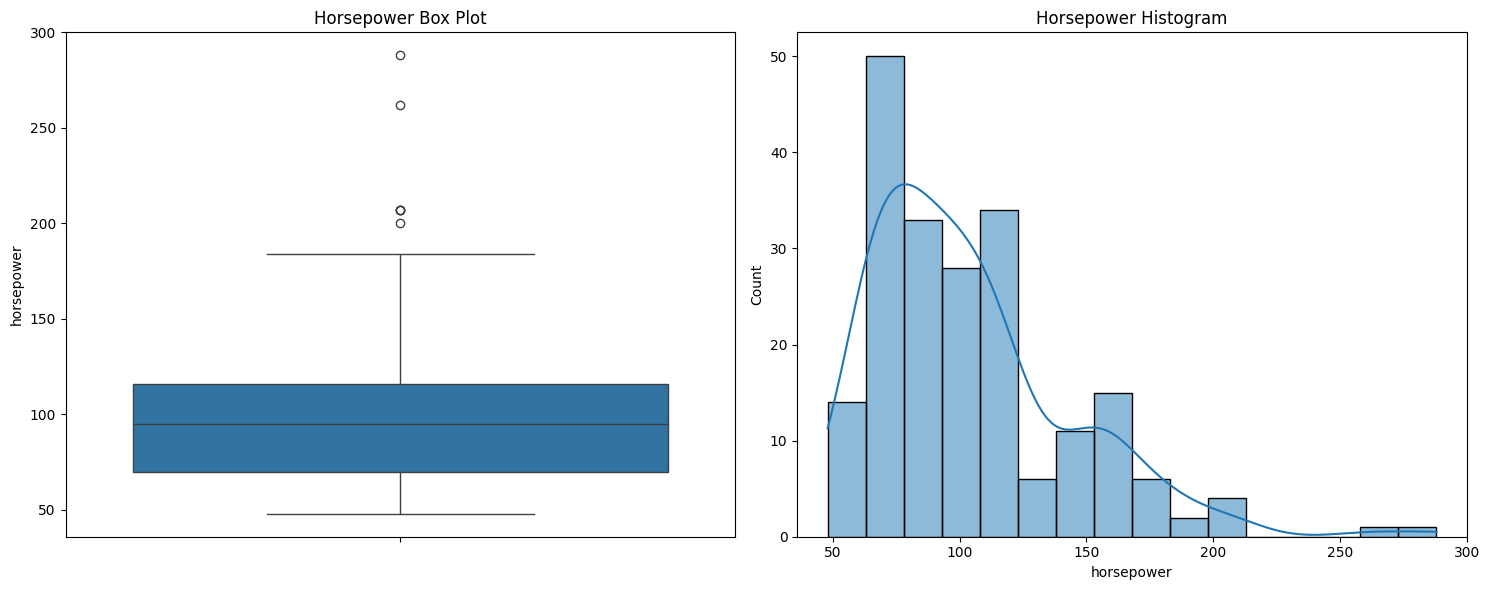

count    205.000000
mean     104.078049
std       39.560127
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64


In [54]:
# Create a figure and axis objects with subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Horsepower Box Plot
sns.boxplot(y='horsepower', data=final_df, ax=axs[0])
axs[0].set_title('Horsepower Box Plot')

# Horsepower Histogram
sns.histplot(final_df['horsepower'], kde=True, ax=axs[1])
axs[1].set_title('Horsepower Histogram')

plt.tight_layout()  # Adjusts the plots to prevent overlap
plt.show()

print(df['horsepower'].describe())

The mean (104.08) is greater than the median (95), indicating that the distribution is skewed towards higher values as the mean is pulled to the right by the presence of higher values. cars with higher horsepower, with relatively fewer instances of lower horsepower vehicles because engine-size are higher so horsepower is also directly proportional.

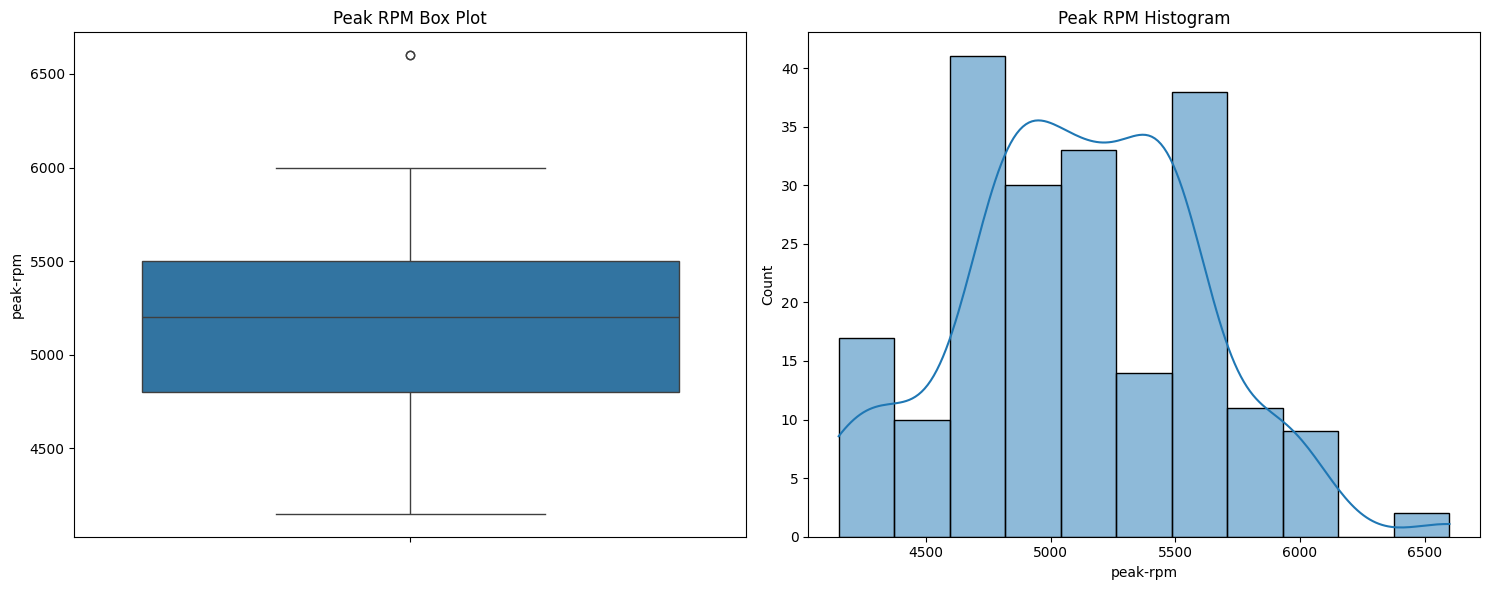

count     205.000000
mean     5124.146341
std       477.139021
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64


In [55]:
# Create a figure and axis objects with subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Peak RPM Box Plot
sns.boxplot(y='peak-rpm', data=final_df, ax=axs[0])
axs[0].set_title('Peak RPM Box Plot')

# Peak RPM Histogram
sns.histplot(final_df['peak-rpm'], kde=True, ax=axs[1])
axs[1].set_title('Peak RPM Histogram')

plt.tight_layout()  # Adjusts the plots to prevent overlap
plt.show()

print(df['peak-rpm'].describe())

The majority of the cars might have their peak RPM around mean and median values. Although engine-size are high it doesn't mean rpm is high only gor bigger engines, there are scenarios where RPM is good for smaller size engines too.

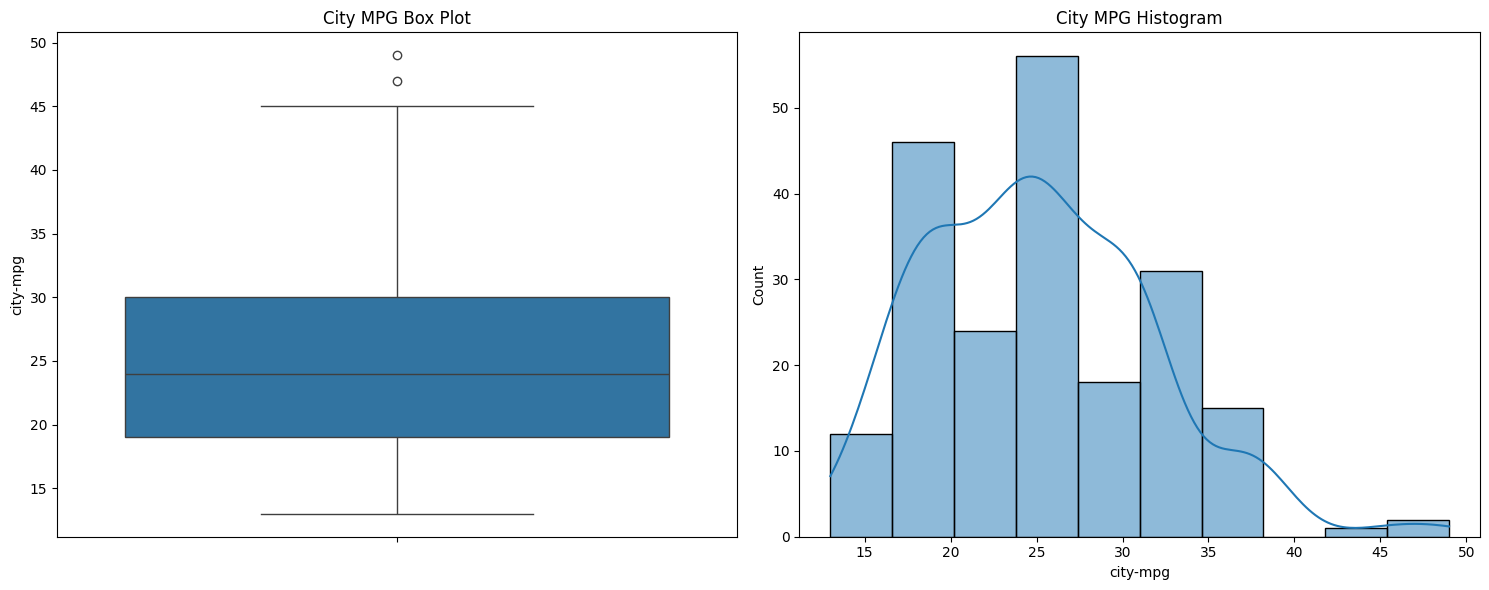

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city-mpg, dtype: float64

In [56]:
# Create a figure and axis objects with subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# City MPG Box Plot
sns.boxplot(y='city-mpg', data=final_df, ax=axs[0])
axs[0].set_title('City MPG Box Plot')

# City MPG Histogram
sns.histplot(final_df['city-mpg'], kde=True, ax=axs[1])
axs[1].set_title('City MPG Histogram')

plt.tight_layout()  # Adjusts the plots to prevent overlap
plt.show()

df['city-mpg'].describe()

It indicates that there is relatively less variability or skewness in fuel efficiency among the cars for city driving. The normal-like distribution suggests that the majority of cars perform similarly in terms of city fuel consumption

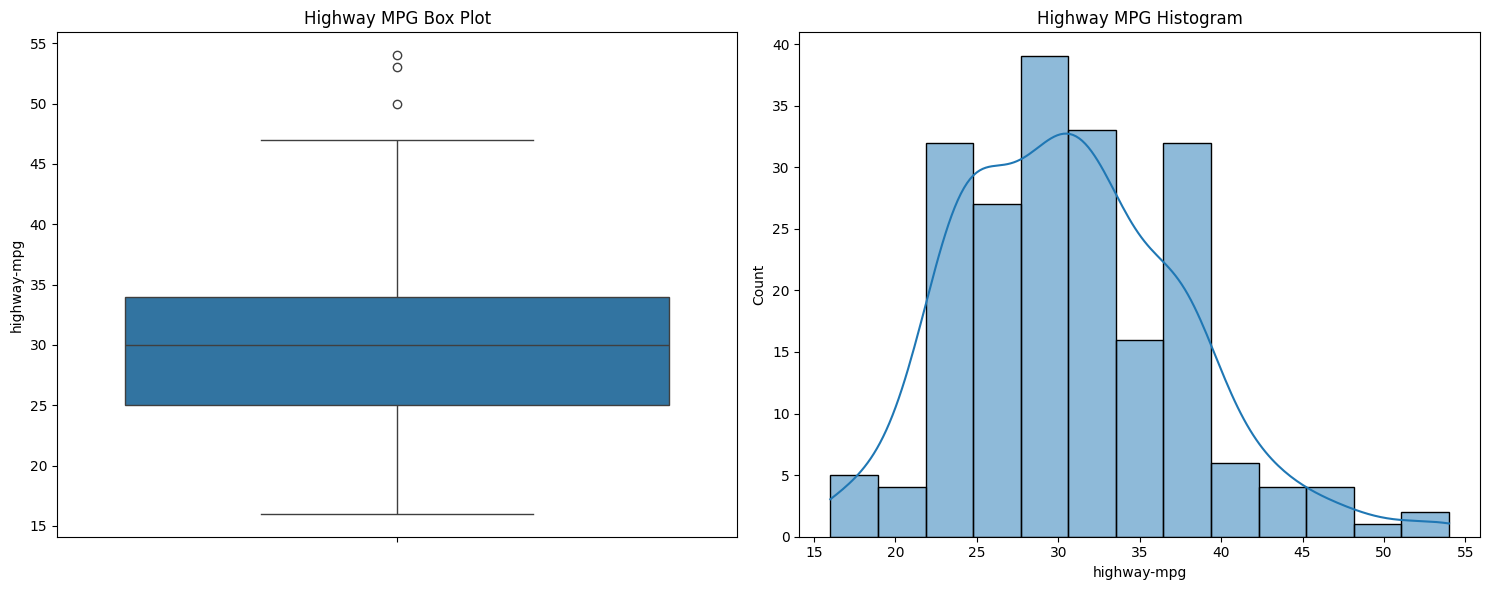

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highway-mpg, dtype: float64


In [57]:
# Create a figure and axis objects with subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Highway MPG Box Plot
sns.boxplot(y='highway-mpg', data=final_df, ax=axs[0])
axs[0].set_title('Highway MPG Box Plot')

# Highway MPG Histogram
sns.histplot(final_df['highway-mpg'], kde=True, ax=axs[1])
axs[1].set_title('Highway MPG Histogram')

plt.tight_layout()  # Adjusts the plots to prevent overlap
plt.show()

print(df['highway-mpg'].describe())

The positive skewness suggests that a larger number of vehicles in the dataset tend to have better fuel efficiency on highways. The mean value being higher than the median and the tail extending towards higher mpg values indicates that while most cars have good fuel efficiency, there are some outliers that achieve exceptionally high fuel efficiency on highways.

It indicates that there is relatively  variability or skewness in fuel efficiency among the cars for city driving. The normal-like distribution suggests that the majority of cars perform similarly in terms of city fuel consumption

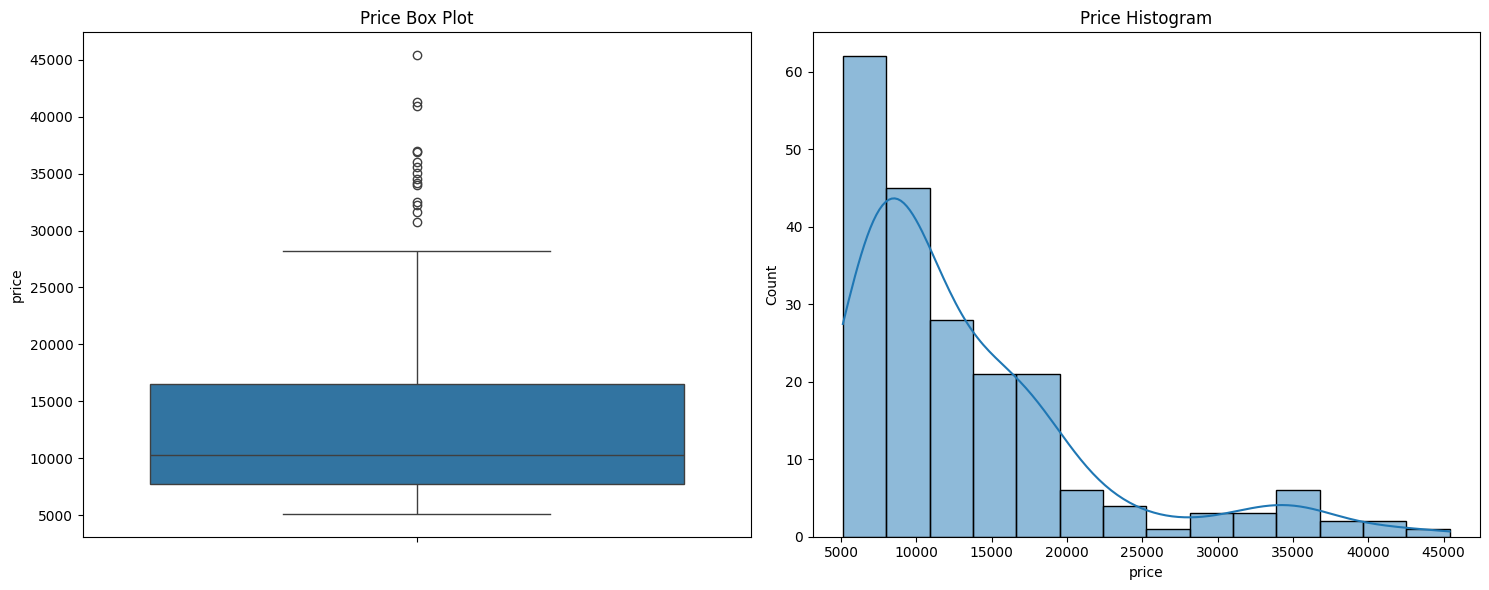

count      205.000000
mean     13287.648015
std       8052.212817
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [58]:
# Create a figure and axis objects with subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Price Box Plot
sns.boxplot(y='price', data=final_df, ax=axs[0])
axs[0].set_title('Price Box Plot')

# Price Histogram
sns.histplot(final_df['price'], kde=True, ax=axs[1])
axs[1].set_title('Price Histogram')

plt.tight_layout()  # Adjusts the plots to prevent overlap
plt.show()

print(df['price'].describe())

### Bivariate Analysis

#### manufacturer (categorical) vs engine-size (numerical)

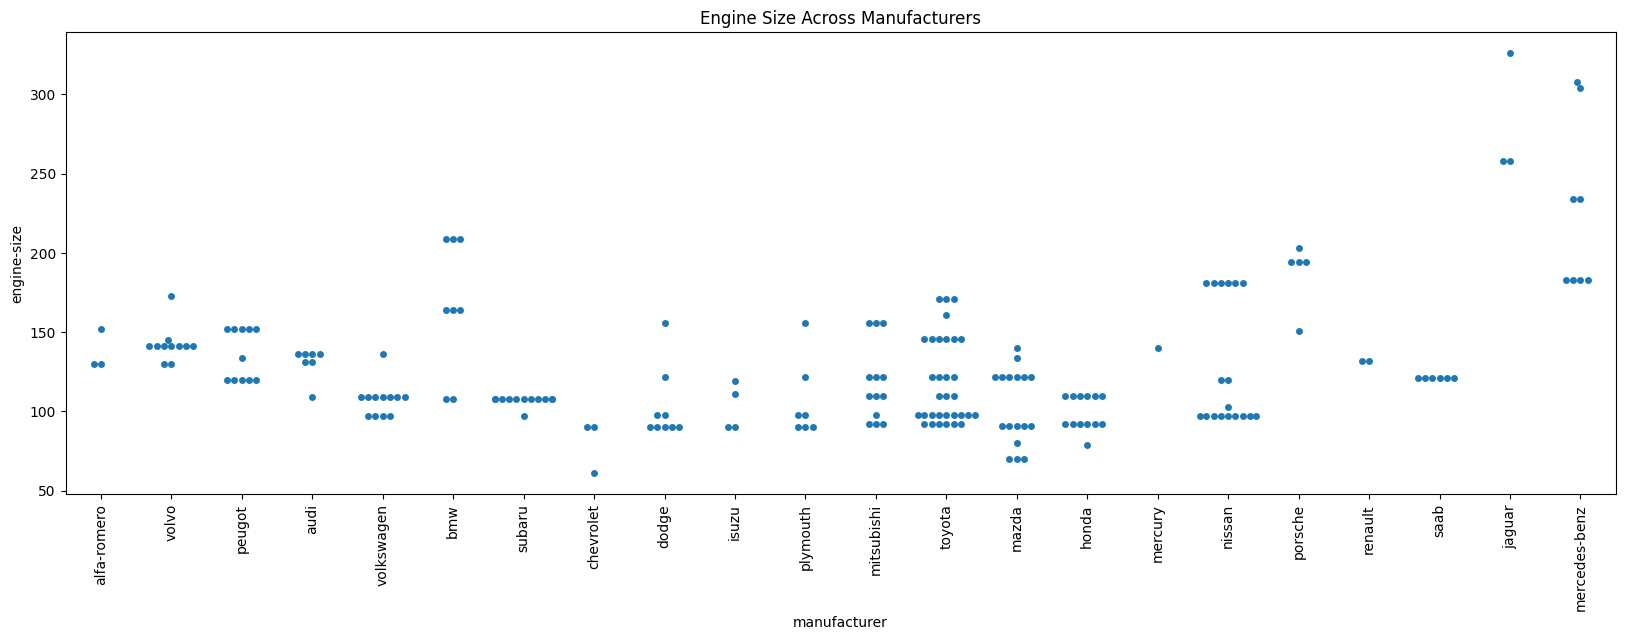

In [59]:
plt.figure(figsize=(20, 6))
sns.swarmplot(x='manufacturer', y='engine-size', data=final_df)
plt.title('Engine Size Across Manufacturers')
plt.xticks(rotation=90)
plt.show()

swarmplot helps to discover trends in engine sizes across different manufacturers as we see that individual dots next to each other in sideways implies brand consistently produces vehicles with similar engine sizes. vertically stacking dots with much gaps indicates that differences in engine sizes w.r.to each manufacturer.

#### body-style (Categorical) vs fuel-type (Categorical)

<Axes: xlabel='body-style'>

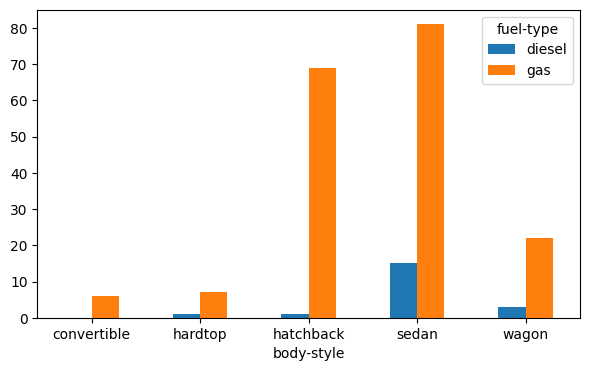

In [60]:
CrosstabResult=pd.crosstab(index=final_df['body-style'],columns=final_df['fuel-type'])

CrosstabResult.plot.bar(figsize=(7,4), rot=0)

mostly sedan and hatchback are widely used with gas engines, however we can observe that the diesel engines are mostly from sedan only.

####  (Numeric) vs.  (Numeric) - Correlation

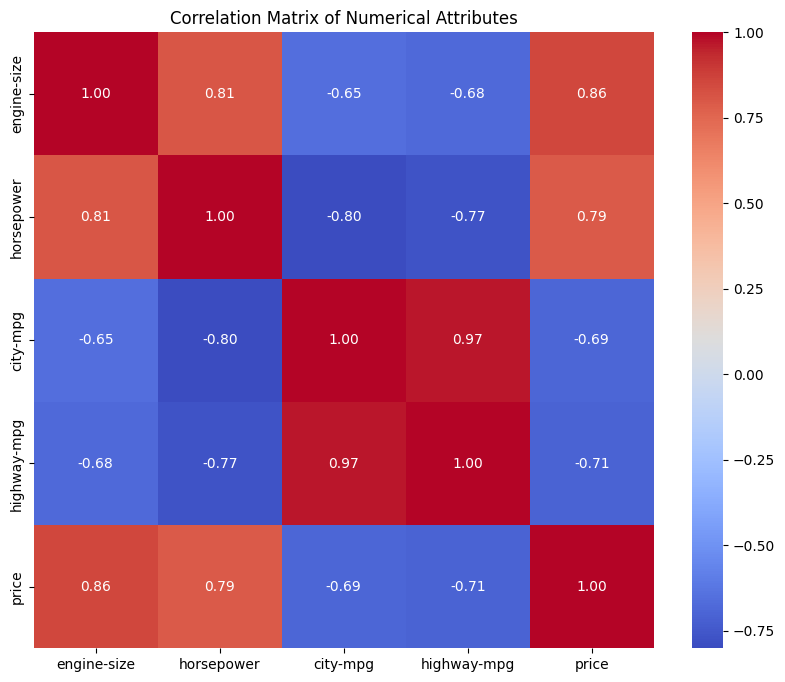

In [61]:
numerical_attributes = final_df[['engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price']]
correlation_matrix = numerical_attributes.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()

we can observe that 0.97 correlation might imply that both highway-mpg and city-mpg contains similar or redundant information for predictive purposes, as they are strongly related to each other.
with 0.86 engine-size and price is also strongly correlated with each other.

### Multivariate Analysis

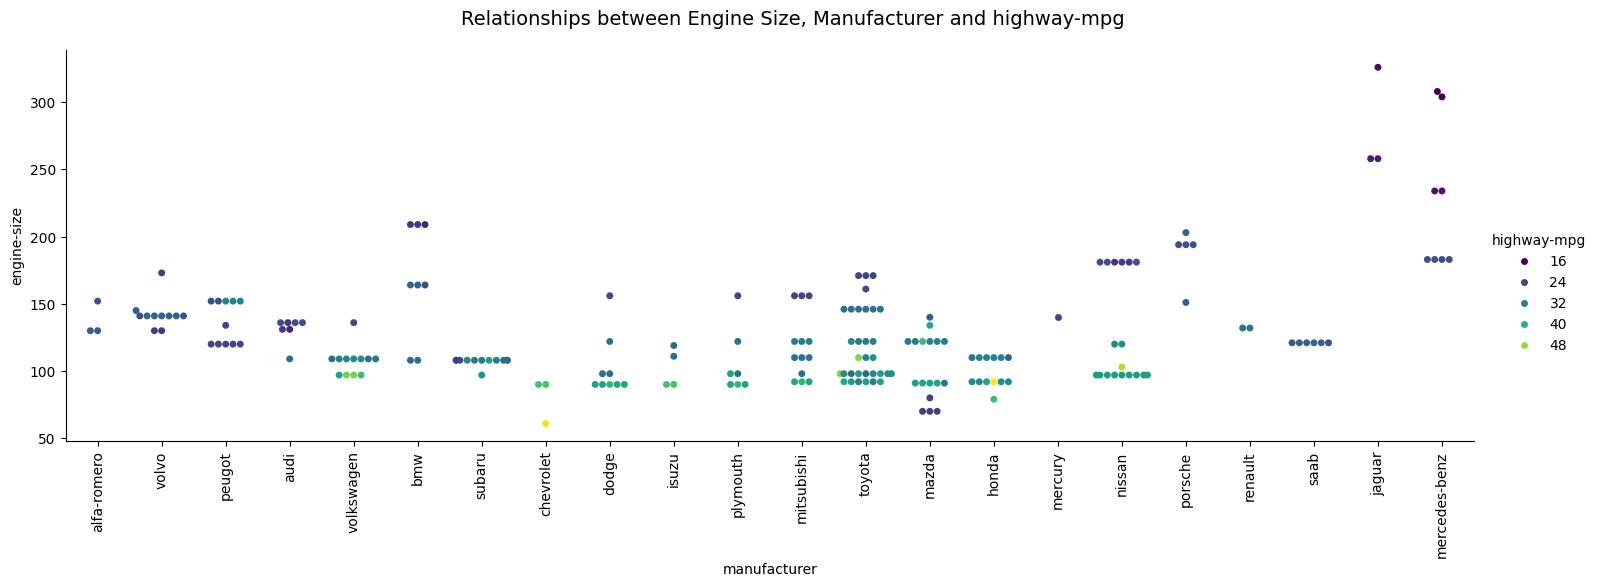

In [62]:
sns.catplot(x='manufacturer', y='engine-size', hue='highway-mpg',
            palette='viridis', kind='swarm', data=final_df, height=5, aspect=3)

# Adjusting the layout
plt.subplots_adjust(top=0.9)
plt.suptitle('Relationships between Engine Size, Manufacturer and highway-mpg', fontsize=14)
plt.xticks(rotation=90)
plt.show()

chevrolet and honda produces the nest highway-mpg with small engine-size although the benz manufacturer produces larger engines their mileage is pretty much low. We can observe same engine size gives almost same mileage.

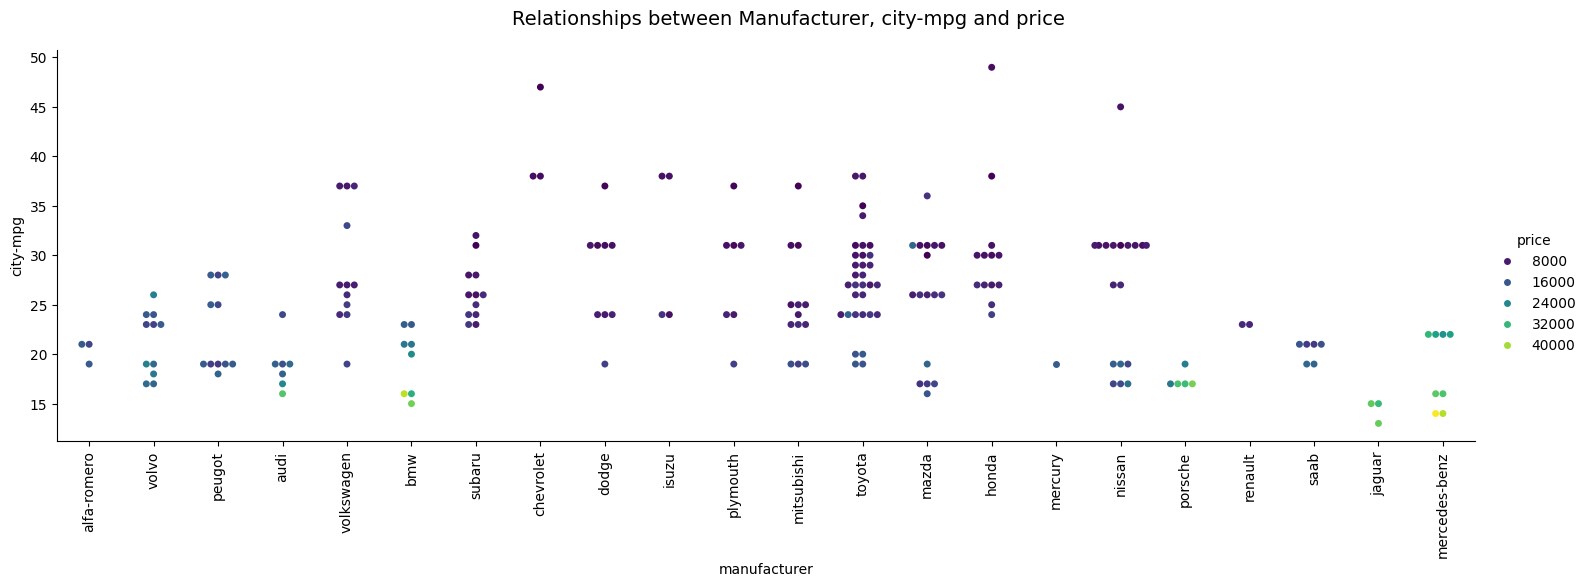

In [63]:
sns.catplot(x='manufacturer', y='city-mpg', hue='price',
            palette='viridis', kind='swarm', data=final_df, height=5, aspect=3)

# Adjusting the layout
plt.subplots_adjust(top=0.9)
plt.suptitle('Relationships between Manufacturer, city-mpg and price', fontsize=14)
plt.xticks(rotation=90)
plt.show()

Chevrolet and Honda prices are low more their mileage in city is higher than manufacturers.

### Conclusion -

As per dataset, for long-drives and mileage aspects taking into consideration along with affordable prices it's prefer to have Chevrolet, Honda and Nissan vehicles in small to medium engine-size which operates on gas.